In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mpl_toolkits as mplot3d
import scipy as sp
pd.set_option("display.max_columns", None)
from tqdm import tqdm
tqdm.pandas()

In [2]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

# DATA CLEANING AND WRANGLING

## Typeform Data

In [3]:
d0 = pd.read_csv('India_riskliteracy_dataset_above median_2024_new.csv').rename({"#":"ResponseId"}, axis = 1)
d0

ResponseId  Unnamed: 1  \
0    00dn8csjzlekx6gzhrcv00dn8csj32tz         547   
1    00ujdxbfoya0donu8r00ujcjdkojc99x         428   
2    01ro2iftnum5v4cn01r03c75aa24emhq         528   
3    022xoawhrghfhv4a1g022xmz7hb0m41f         442   
4    02pxtdbyibecqqfvwlw02pxwfbane9zd         558   
..                                ...         ...   
638  zeoufbqlngfunzzeoymhtj2sp5cw6lur         396   
639  zfemo30rg0ekva18x1kjwzfemo2wpg2p         185   
640  znqvw4t38br3072znqvwvjsgb6wvj7nt         305   
641  zstpq23h1x3ilab8s8vsrbkw8t4zstpq         306   
642  ztfdlcbiyo1xco3ztfdl4ozqpte2q3m9          95   

                                  #.1 Please indicate your Gender.  \
0    00dn8csjzlekx6gzhrcv00dn8csj32tz                         Male   
1    00ujdxbfoya0donu8r00ujcjdkojc99x                       Female   
2    01ro2iftnum5v4cn01r03c75aa24emhq                       Female   
3    022xoawhrghfhv4a1g022xmz7hb0m41f                       Female   
4    02pxtdbyibecqqfvwlw02pxwfbane9zd                       Female   
..                                ...                          ...   
638  zeoufbqlngfunzzeoymhtj2sp5cw6lur                         Male   
639  zfemo30rg0ekva18x1kjwzfemo2wpg2p                         Male   
640  znqvw4t38br3072znqvwvjsgb6wvj7nt                       Female   
641  zstpq23h1x3ilab8s8vsrbkw8t4zstpq                         Male   
642  ztfdlcbiyo1xco3ztfdl4ozqpte2q3m9                         Male   

    Please mark your age (in years) What is currently your highest Education?  \
0                           25 - 35                            Under Graduate   
1                           25 - 35                            Under Graduate   
2                           18 - 25                            Under Graduate   
3                           46 - 55                            Under Graduate   
4                           46 - 55                             Post Graduate   
..                              ...                                       ...   
638                         25 - 35                             Post Graduate   
639                         36 - 45                           Ph.D. or higher   
640                         36 - 45                             Post Graduate   
641                         18 - 25                            Under Graduate   
642                         25 - 35                             Post Graduate   

                 Please state your current occupation.  \
0    Investment Professional, i.e. stock broker/tra...   
1    Employee/Consultant in Other than the Finance ...   
2                                              Student   
3                         Entrepreneur or Own Business   
4    Employee/Consultant in Other than the Finance ...   
..                                                 ...   
638  Investment Professional, i.e. stock broker/tra...   
639  Employee/Consultant in Other than the Finance ...   
640                       Entrepreneur or Own Business   
641                       Entrepreneur or Own Business   
642                       Entrepreneur or Own Business   

     How do you describe your willingness to take financial risk in general?  \
0                                                    7                         
1                                                    7                         
2                                                    5                         
3                                                    5                         
4                                                    6                         
..                                                 ...                         
638                                                  3                         
639                                                  6                         
640                                                  5                         
641                                                  6                         

## Demographics

In [4]:
# Age groups/rec = [2,3,4]
# Age group 2 = 18 to 35 y/o
# Age group 3 = 36 to 55 y/o
# Age group 4 = 56 to 75 y/o (75 y/o, i.e, within the scope of the data we have, it can mean 60 and above also)

d0["age_rec"] = np.where( d0["Please mark your age (in years)"] == "18 - 25" , 2,
                          np.where(d0["Please mark your age (in years)"] == "25 - 35", 2,
                                   np.where( d0["Please mark your age (in years)"] == "36 - 45", 3,
                                            np.where( d0["Please mark your age (in years)"] == "46 - 55", 3,
                                                     np.where( d0["Please mark your age (in years)"] == "56 - 65", 4,
                                                              np.where( d0["Please mark your age (in years)"] == "Above 65", 4, 0
                                                                      )
                                                             )
                                                    )
                                           )
                                  )
                        )

d0["age"] = np.where( d0["Please mark your age (in years)"] == "18 - 25" , (18 + 25) / 2,
                          np.where(d0["Please mark your age (in years)"] == "25 - 35", (26 + 35) / 2,
                                   np.where( d0["Please mark your age (in years)"] == "36 - 45", (36 + 45) / 2,
                                            np.where( d0["Please mark your age (in years)"] == "46 - 55", (46 + 55) / 2,
                                                     np.where( d0["Please mark your age (in years)"] == "56 - 65", (56 + 65) / 2,
                                                              np.where( d0["Please mark your age (in years)"] == "Above 65", (66 + 75) / 2, 0
                                                                      )
                                                             )
                                                    )
                                           )
                                  )
                        )


# Secondary upto 10 – ISCED 3
# Senior Secondary upto 12 - ISCED 3 
# Diploma and voca – ISCED 2
# UG – ISCED 2
# PG – ISCED 1
# PhD and higher – ISCED 1

d0["isced"] = np.where(d0["What is currently your highest Education?"] == "Post Graduate", 1,
                        np.where(d0["What is currently your highest Education?"] == "Under Graduate", 2,
                                 np.where(d0["What is currently your highest Education?"] == "Ph.D. or higher", 1,
                                          np.where(d0["What is currently your highest Education?"] == "Diploma or vocation training", 2,
                                                   np.where(d0["What is currently your highest Education?"] == "School degree (X or XII)", 3, 0
                                                           )
                                                  )
                                         )
                                )
                       )

d0["income"] = np.where(d0["Please indicate your approximate annual personal income from all sources for last year"] == "&lt; 5,00,000", 1,
                         np.where(d0["Please indicate your approximate annual personal income from all sources for last year"] == "5,00,000 - 15,00,000", 2,
                                  np.where(d0["Please indicate your approximate annual personal income from all sources for last year"] == "15,00,001 - 25,00,000", 3,
                                           np.where(d0["Please indicate your approximate annual personal income from all sources for last year"] == "25,00,001 - 35,00,000", 4,
                                                    np.where(d0["Please indicate your approximate annual personal income from all sources for last year"] == "35,00,001 - 45,00,000", 4,
                                                             np.where( d0["Please indicate your approximate annual personal income from all sources for last year"] == "&gt; 45,00,000", 5,0
                                                                     )
                                                            )
                                                   )
                                           )
                                  )
                         )

d0["wealth"] = d0["Please provide a rough guess (in Indian Rupees) of the worth of your household's assets. Please do not forget to correct it for your debts, such as a mortgage or any loans you might have."]


## Scoring

In [5]:
d0["Certainty_3"] = d0["certainty1"] + d0["certainty2"] + d0["certainty3"]
d0["RiskComprehension_3"] = d0["riskcalculation1"] + d0["riskcalculation2"] + d0["riskcalculation4"]
d0["GraphLiteracy_3"] = d0["graph1"] + d0["graph2"] + d0["graph3"]
d0["Numeracy_3"] = d0["numeracy1"] + d0["numeracy2"] + d0["numeracy3"]
d0["Bayesianreasoning_1"] = d0["numeracy4"]
d0["TotalScore_13"] = d0["Certainty_3"] + d0["RiskComprehension_3"] + d0["GraphLiteracy_3"] + d0["Numeracy_3"] + d0["Bayesianreasoning_1"]

d0["Certainty_%"] = d0["Certainty_3"] / 3 * 100
d0["RiskComprehension_%"] = d0["RiskComprehension_3"] / 3 * 100
d0["GraphLiteracy_%"] = d0["GraphLiteracy_3"] / 3 * 100
d0["Numeracy_%"] = d0["Numeracy_3"] / 3 * 100
d0["Bayesianreasoning_%"] = d0["Bayesianreasoning_1"] / 1 * 100

d0["TotalScore_%"] = d0["TotalScore_13"] / 13 * 100


colReq = ["ResponseId", "age", "age_rec", "isced", "income", "wealth", "Certainty_3", "RiskComprehension_3", "GraphLiteracy_3",
          "Numeracy_3", "Bayesianreasoning_1", "Certainty_%", "RiskComprehension_%", "GraphLiteracy_%", "Numeracy_%", "Bayesianreasoning_%",
          "TotalScore_13", "TotalScore_%",]

df2 = d0[colReq].copy()
df2

ResponseId   age  age_rec  isced  income    wealth  \
0    00dn8csjzlekx6gzhrcv00dn8csj32tz  30.5        2      2       2     50000   
1    00ujdxbfoya0donu8r00ujcjdkojc99x  30.5        2      2       1   1500000   
2    01ro2iftnum5v4cn01r03c75aa24emhq  21.5        2      2       2    500000   
3    022xoawhrghfhv4a1g022xmz7hb0m41f  50.5        3      2       1  15000000   
4    02pxtdbyibecqqfvwlw02pxwfbane9zd  50.5        3      1       2   3000000   
..                                ...   ...      ...    ...     ...       ...   
638  zeoufbqlngfunzzeoymhtj2sp5cw6lur  30.5        2      1       1     50000   
639  zfemo30rg0ekva18x1kjwzfemo2wpg2p  40.5        3      1       3   8500000   
640  znqvw4t38br3072znqvwvjsgb6wvj7nt  40.5        3      1       2   2000000   
641  zstpq23h1x3ilab8s8vsrbkw8t4zstpq  21.5        2      2       2  60000000   
642  ztfdlcbiyo1xco3ztfdl4ozqpte2q3m9  30.5        2      1       3   5000000   

     Certainty_3  RiskComprehension_3  GraphLiteracy_3  Numeracy_3  \
0              0                    0                1           1   
1              0                    1                1           2   
2              1                    0                0           0   
3              0                    1                1           2   
4              0                    0                1           3   
..           ...                  ...              ...         ...   
638            2                    1                0           3   
639            1                    2                2           3   
640            0                    3                2           1   
641            1                    1                1           1   
642            1                    2                1           3   

     Bayesianreasoning_1  Certainty_%  RiskComprehension_%  GraphLiteracy_%  \
0                      0     0.000000             0.000000        33.333333   
1                      0     0.000000            33.333333        33.333333   
2                      1    33.333333             0.000000         0.000000   
3                      0     0.000000            33.333333        33.333333   
4                      0     0.000000             0.000000        33.333333   
..                   ...          ...                  ...              ...   
638                    1    66.666667            33.333333         0.000000   
639                    1    33.333333            66.666667        66.666667   
640                    0     0.000000           100.000000        66.666667   
641                    0    33.333333            33.333333        33.333333   
642                    0    33.333333            66.666667        33.333333   

     Numeracy_%  Bayesianreasoning_%  TotalScore_13  TotalScore_%  
0     33.333333                  0.0              2     15.384615  
1     66.666667                  0.0              4     30.769231  
2      0.000000                100.0              2     15.384615  
3     66.666667                  0.0              4     30.769231  
4    100.000000                  0.0              4     30.769231  
..          ...                  ...            ...           ...  
638  100.000000                100.0              7     53.846154  
639  100.000000                100.0              9     69.230769  
640   33.333333                  0.0              6     46.153846  
641   33.333333                  0.0              4     30.769231  
642  100.000000                  0.0              7     53.846154  

[643 rows x 18 columns]

# GRAPHS

<Axes: title={'center': 'Frequency of Scores'}, xlabel='TotalScore_13', ylabel='Frequency'>

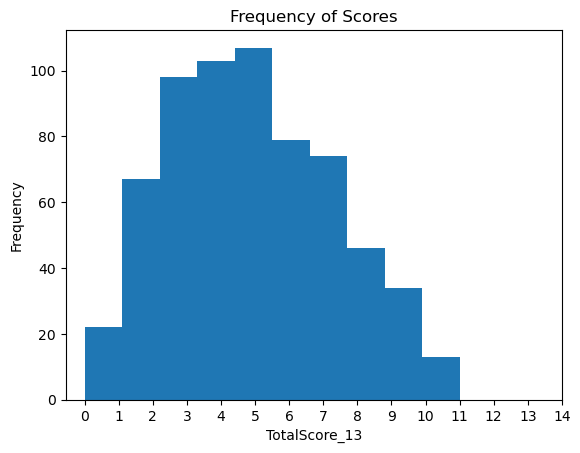

In [6]:
# The following graph represents frequency of each data point on "TotalScore_13" or the total score out of 19 questions across the sample.

df2['TotalScore_13'].plot(kind = 'hist', xticks = np.arange(0, 15, step=1), xlabel = 'TotalScore_13', title = 'Frequency of Scores' )

<Axes: title={'center': 'Absolute mean of scores for above data set'}>

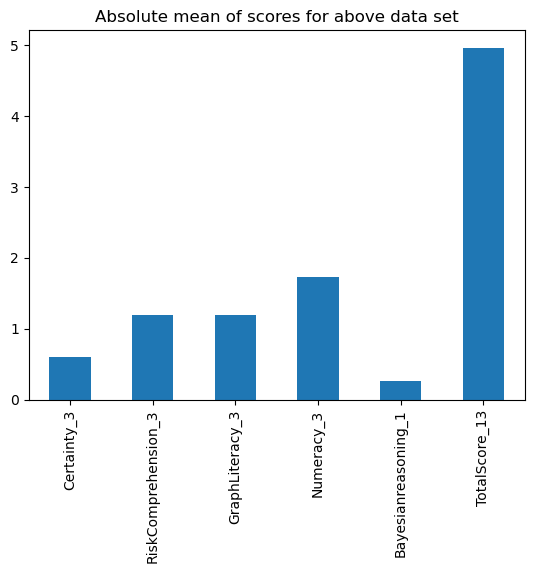

In [7]:
# Absolute mean scores for each facet

(df2[['Certainty_3','RiskComprehension_3','GraphLiteracy_3','Numeracy_3','Bayesianreasoning_1','TotalScore_13']].mean(axis = 0)).plot(kind = 'bar', title = 'Absolute mean of scores for above data set')

<Axes: title={'center': 'Normalised mean of scores for above data set'}>

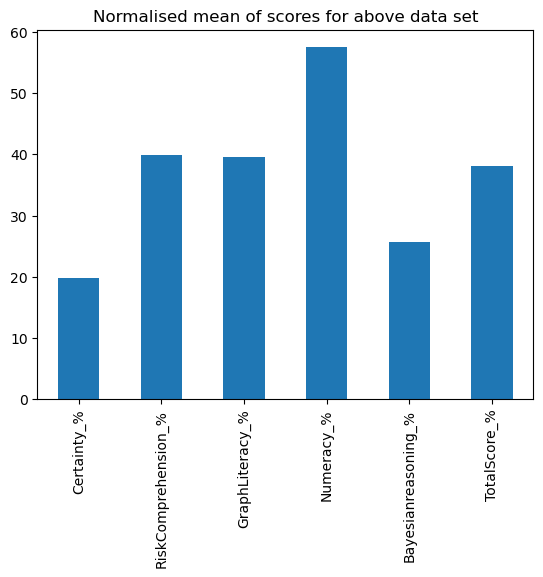

In [8]:
# Normalised mean scores for each facet

df2[['Certainty_%','RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%','TotalScore_%']].mean(axis = 0).plot(kind = 'bar', title = 'Normalised mean of scores for above data set')

In [9]:
# DF3 = Sorted by income

df3 = df2.sort_values(by = 'income')
df3 = df3.reset_index(drop = True)
df3.drop(df3[df3['income'] == 7].index, inplace = True)

df3

ResponseId   age  age_rec  isced  income    wealth  \
0    ingapx8z0r0iwgemwuiiingaf2dww17d  21.5        2      2       1    500000   
1    75j5pullab0sviophrp0hc75j5pulim7  40.5        3      1       1     25000   
2    77fnlcmnn3dd87xjjuo77fnlcmed8um0  21.5        2      2       1    400000   
3    s0p9cmpv4i57ggdrg5s0p9celrn67f5t  30.5        2      2       1     10000   
4    qt4btily2rqt6phgfaldqt4btixo2oe9  30.5        2      1       1    600000   
..                                ...   ...      ...    ...     ...       ...   
638  alcoyba11awn9vvix2tuqalcv334ujjn  40.5        3      1       5    500000   
639  h3a9zgz6oqok61u5wlih3a9zlcttqjh4  40.5        3      1       5    100000   
640  mm3ssp5awgi65mm3swpzf5noxwgwuflz  30.5        2      1       5  10000000   
641  5n0dsv02wzxwoiof6a8un5n0dsv0oq7w  30.5        2      2       5   2500000   
642  v67uulhrlg60vnn3hv67uu4q0w9v3lov  50.5        3      1       5   1500000   

     Certainty_3  RiskComprehension_3  GraphLiteracy_3  Numeracy_3  \
0              0                    0                1           3   
1              0                    2                2           3   
2              1                    3                1           2   
3              0                    2                0           2   
4              0                    0                2           1   
..           ...                  ...              ...         ...   
638            0                    1                1           1   
639            2                    0                0           2   
640            1                    1                0           1   
641            0                    0                2           2   
642            3                    0                0           2   

     Bayesianreasoning_1  Certainty_%  RiskComprehension_%  GraphLiteracy_%  \
0                      0     0.000000             0.000000        33.333333   
1                      0     0.000000            66.666667        66.666667   
2                      1    33.333333           100.000000        33.333333   
3                      1     0.000000            66.666667         0.000000   
4                      0     0.000000             0.000000        66.666667   
..                   ...          ...                  ...              ...   
638                    0     0.000000            33.333333        33.333333   
639                    1    66.666667             0.000000         0.000000   
640                    0    33.333333            33.333333         0.000000   
641                    0     0.000000             0.000000        66.666667   
642                    0   100.000000             0.000000         0.000000   

     Numeracy_%  Bayesianreasoning_%  TotalScore_13  TotalScore_%  
0    100.000000                  0.0              4     30.769231  
1    100.000000                  0.0              7     53.846154  
2     66.666667                100.0              8     61.538462  
3     66.666667                100.0              5     38.461538  
4     33.333333                  0.0              3     23.076923  
..          ...                  ...            ...           ...  
638   33.333333                  0.0              3     23.076923  
639   66.666667                100.0              5     38.461538  
640   33.333333                  0.0              3     23.076923  
641   66.666667                  0.0              4     30.769231  
642   66.666667                  0.0              5     38.461538  

[643 rows x 18 columns]

<Axes: title={'center': 'Absolute mean score for each facet (Sort by Income)'}>

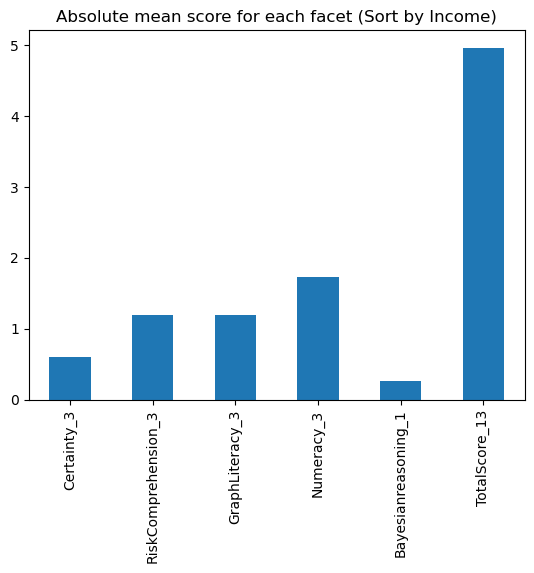

In [10]:
# Absolute mean score for each facet (Sort by Income)

df3[['Certainty_3','RiskComprehension_3','GraphLiteracy_3','Numeracy_3','Bayesianreasoning_1','TotalScore_13']].mean(axis = 0).plot(kind = 'bar', title = 'Absolute mean score for each facet (Sort by Income)')

<Axes: title={'center': 'Normalised mean score for each facet (Sort by Income)'}>

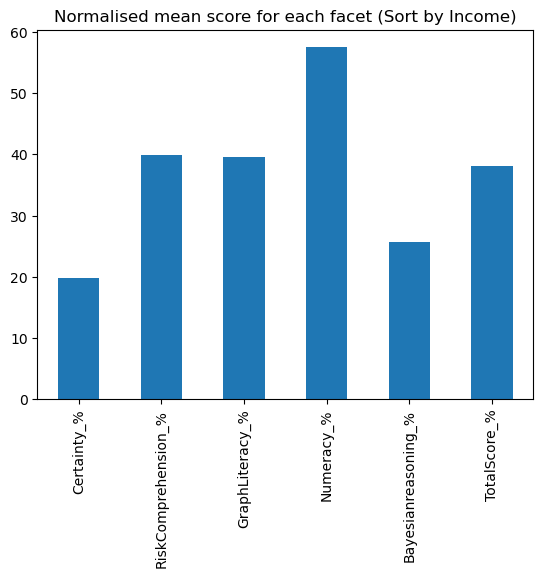

In [11]:
# Normalised mean score for each facet (Sort by Income)

(df3[['Certainty_%','RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%','TotalScore_%']].mean(axis = 0)).plot(kind = 'bar', title = 'Normalised mean score for each facet (Sort by Income)')

In [12]:
# Normalised mean of each facet as a numerical (sorted by income)

df3.groupby('income')[['Certainty_%','RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%','TotalScore_%']].mean()

Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
income                                                                  
1         21.066667            35.733333        37.600000   60.000000   
2         18.505338            41.992883        42.586002   57.532622   
3         21.763085            41.046832        36.639118   59.228650   
4         20.325203            36.991870        36.991870   53.252033   
5         18.627451            41.176471        38.235294   50.980392   

        Bayesianreasoning_%  TotalScore_%  
income                                     
1                 23.200000     37.415385  
2                 25.978648     39.063783  
3                 24.793388     38.525111  
4                 29.268293     36.303940  
5                 26.470588     36.425339

In [13]:
# Count of responses for each category (sorted by income)

df3.groupby('income')[['ResponseId']].count()

ResponseId
income            
1              125
2              281
3              121
4               82
5               34

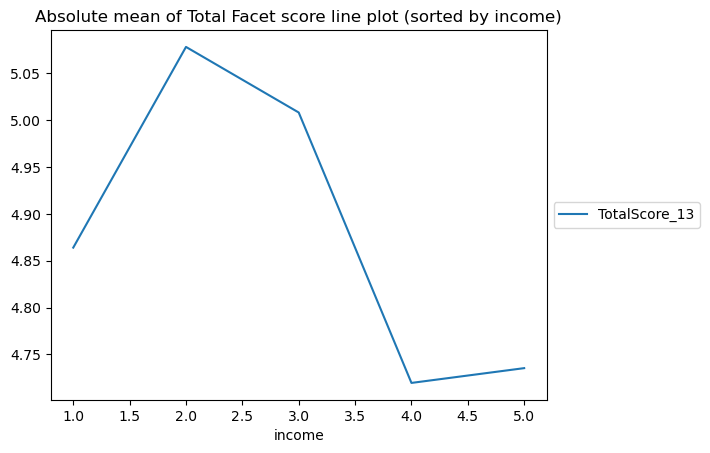

In [14]:
# Absolute mean of Total Facet score line plot (sorted by income)

df3.groupby('income')[['TotalScore_13']].mean().plot( kind = 'line', title = 'Absolute mean of Total Facet score line plot (sorted by income)').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

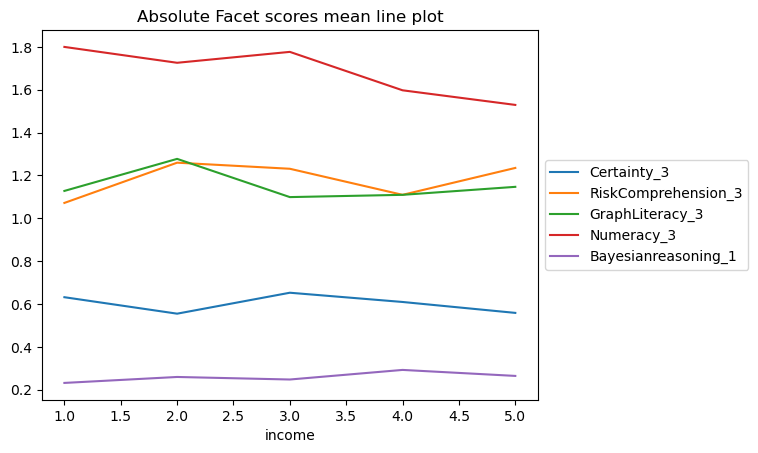

In [15]:
# Absolute mean of each Facet score line plot (sorted by income)

df3.groupby('income')[['Certainty_3','RiskComprehension_3','GraphLiteracy_3','Numeracy_3','Bayesianreasoning_1']].mean().plot( kind = 'line', title = 'Absolute Facet scores mean line plot').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

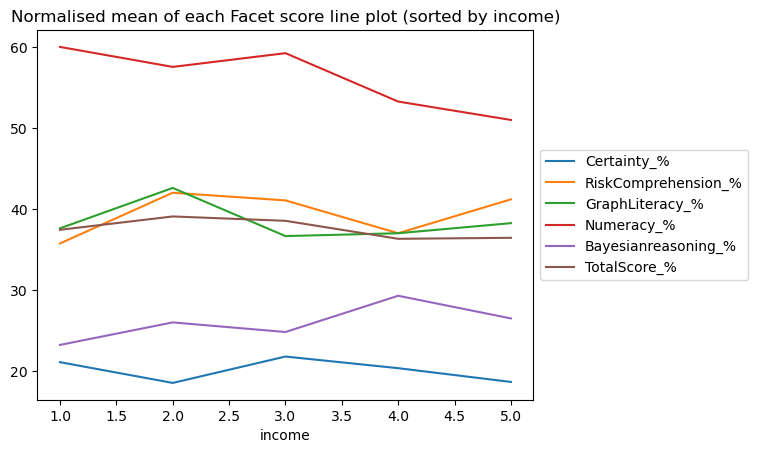

In [16]:
# Normalised mean of each Facet score line plot (sorted by income)


df3.groupby('income')[['Certainty_%','RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%', 'TotalScore_%']].mean().plot( kind = 'line', title = 'Normalised mean of each Facet score line plot (sorted by income)').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

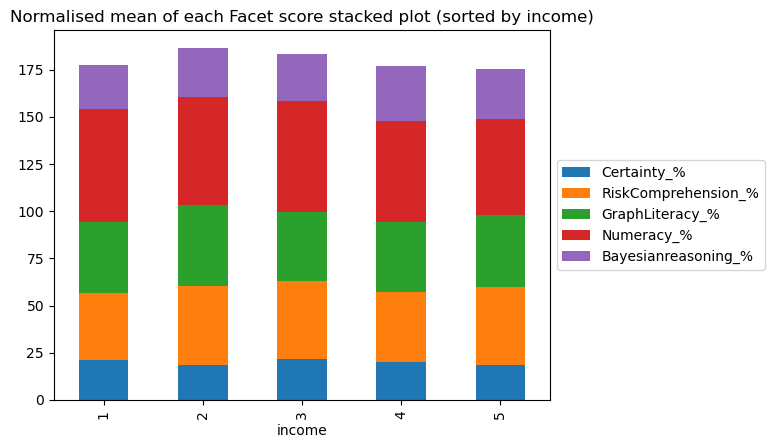

In [17]:
# Normalised mean of each Facet score stacked plot (sorted by income)

df3.groupby('income')[['Certainty_%','RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%']].mean().plot( kind = 'bar', title = 'Normalised mean of each Facet score stacked plot (sorted by income)', stacked = True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

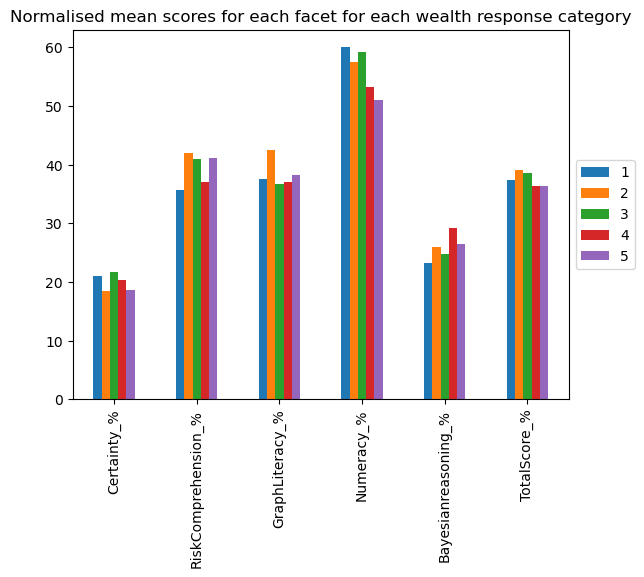

In [18]:
# Normalised mean of each Facet score hist plot (sorted by income)

df3.groupby('income')[['Certainty_%','RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%','TotalScore_%']].mean().T.plot(kind = 'bar', title = 'Normalised mean scores for each facet for each wealth response category').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

<Axes: xlabel='income', ylabel='TotalScore_13'>

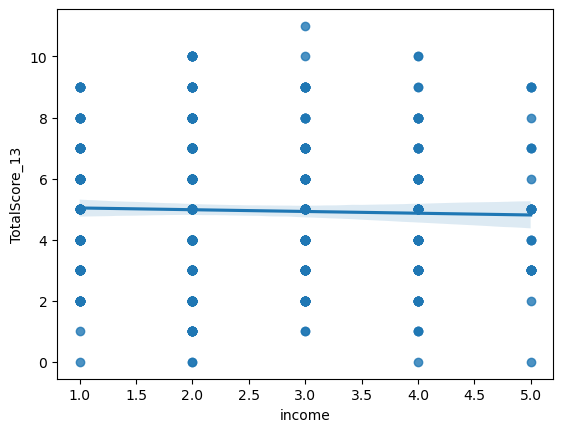

In [19]:
# Trend line for Absolute Total Facet Score vs income

sns.regplot (data = df3, x = 'income', y = 'TotalScore_13')

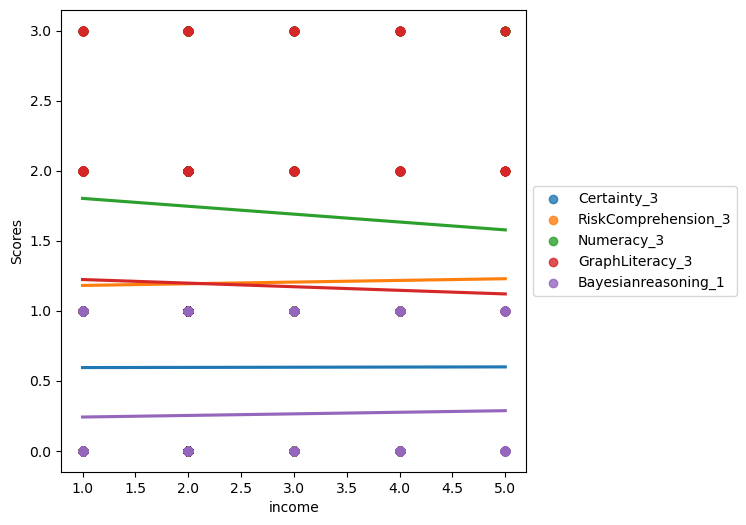

In [20]:
# Trend line for Absolute Independent Facet Score vs income reponses

fig, ax = plt.subplots(figsize=(6, 6))

sns.regplot (data = df3, x = 'income', y = 'Certainty_3', fit_reg=True, ci=None, ax=ax, label='Certainty_3')
sns.regplot (data = df3, x = 'income', y = 'RiskComprehension_3', fit_reg=True, ci=None, ax=ax, label='RiskComprehension_3')
sns.regplot (data = df3, x = 'income', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax, label='Numeracy_3')
sns.regplot (data = df3, x = 'income', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax, label='GraphLiteracy_3')
sns.regplot (data = df3, x = 'income', y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax, label='Bayesianreasoning_1' )

ax.set(ylabel='Scores', xlabel='income')
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

<Axes: xlabel='income', ylabel='TotalScore_13'>

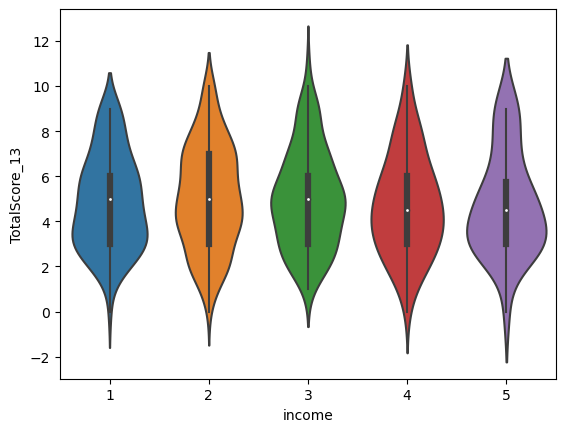

In [21]:
# Violine Plot for TotalScore_13 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'TotalScore_13')

<Axes: xlabel='income', ylabel='Certainty_3'>

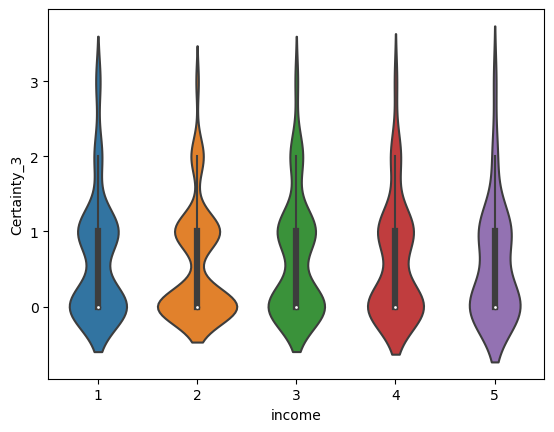

In [22]:
# Violine Plot for Certainty_3 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'Certainty_3')

<Axes: xlabel='income', ylabel='RiskComprehension_3'>

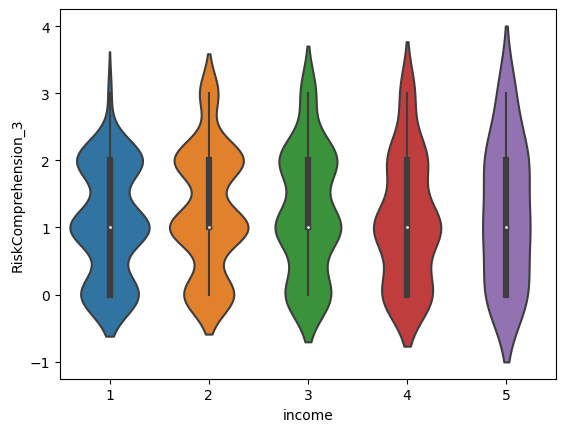

In [23]:
# Violine Plot for RiskComprehension_3 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'RiskComprehension_3')

<Axes: xlabel='income', ylabel='GraphLiteracy_3'>

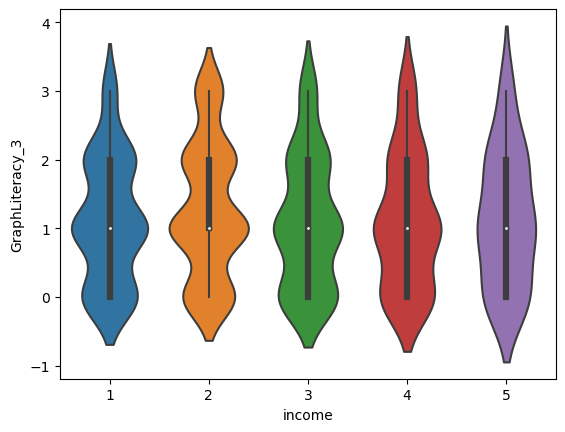

In [24]:
# Violine Plot for GraphLiteracy_3 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'GraphLiteracy_3')

<Axes: xlabel='income', ylabel='Numeracy_3'>

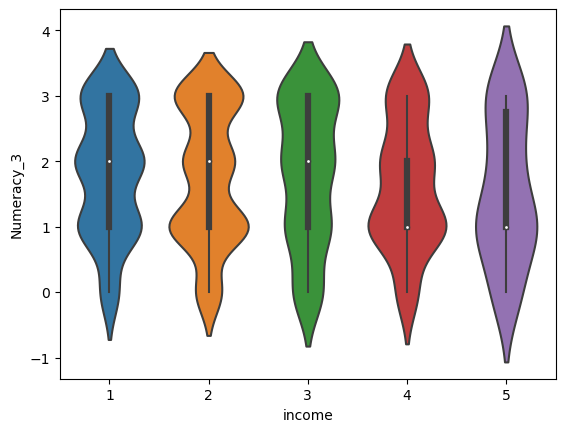

In [25]:
# Violine Plot for Numeracy_3 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'Numeracy_3')

<Axes: xlabel='income', ylabel='Bayesianreasoning_1'>

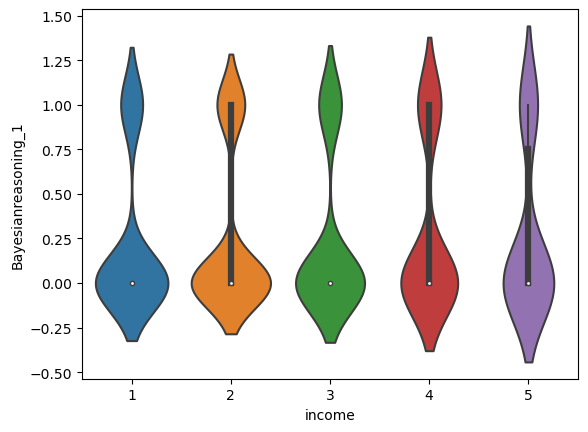

In [26]:
# Violine Plot for TotalScore_13 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'Bayesianreasoning_1')

In [27]:
# Data Frame 2 or df2 is an aggregate data on facet total scores and over all total score, along with wealth and income data vs each response. 
# This data set is also sorted by wealth with all responses 'NA' removed.
# We also assign quartiles ranking each response according to this sort.

df4 = df2.sort_values(by = 'wealth')
df4 = df4.reset_index(drop = True)
df4 = df4.dropna(axis = 0, subset = 'wealth')
df4.insert(loc = len(df4.columns), column = "Quartile Number", value = pd.qcut(df4["wealth"],q = 4, labels = False ) + 1, allow_duplicates = 'False')

df4

ResponseId   age  age_rec  isced  income  \
0    2rkur9ckjvsyz36zmayz1zw2rkur9ckn  40.5        3      1       3   
1    e7ty2tbwa1hcmte7ty683aw64pla7689  30.5        2      2       1   
2    y139mcxc619h0ooosy139muk14mpfpvm  30.5        2      3       1   
3    pz369rewa2ej3jpz39du46dqedgpnaem  21.5        2      1       2   
4    6lyvarwdyk7v7hx2qgs6lyyfqalmor05  30.5        2      1       1   
..                                ...   ...      ...    ...     ...   
638  35zux4sc18rplyz3dc85z35zux4sdfm4  21.5        2      2       4   
639  wn9mk6m1k8o10l1twn9mk6b4z7l7yvhc  50.5        3      1       3   
640  oczyh23wpxpk4o0teoczy5zzzng3i6kk  30.5        2      2       5   
641  4udfypw7lf8mmgjmxr4d4udfym4sx1sf  40.5        3      1       3   
642  zcj7ldokhyo6217f9sriwizcj7ldodwt  40.5        3      2       3   

        wealth  Certainty_3  RiskComprehension_3  GraphLiteracy_3  Numeracy_3  \
0            0            1                    0                0           2   
1            0            0                    1                1           1   
2            0            3                    1                0           2   
3            2            1                    1                3           3   
4            2            2                    1                0           1   
..         ...          ...                  ...              ...         ...   
638  500000000            1                    1                0           1   
639  500000000            1                    2                3           3   
640  500000000            1                    2                3           3   
641  500000000            0                    0                0           2   
642  600000000            1                    3                1           1   

     Bayesianreasoning_1  Certainty_%  RiskComprehension_%  GraphLiteracy_%  \
0                      0    33.333333             0.000000         0.000000   
1                      0     0.000000            33.333333        33.333333   
2                      0   100.000000            33.333333         0.000000   
3                      0    33.333333            33.333333       100.000000   
4                      0    66.666667            33.333333         0.000000   
..                   ...          ...                  ...              ...   
638                    0    33.333333            33.333333         0.000000   
639                    0    33.333333            66.666667       100.000000   
640                    0    33.333333            66.666667       100.000000   
641                    1     0.000000             0.000000         0.000000   
642                    0    33.333333           100.000000        33.333333   

     Numeracy_%  Bayesianreasoning_%  TotalScore_13  TotalScore_%  \
0     66.666667                  0.0              3     23.076923   
1     33.333333                  0.0              3     23.076923   
2     66.666667                  0.0              6     46.153846   
3    100.000000                  0.0              8     61.538462   
4     33.333333                  0.0              4     30.769231   
..          ...                  ...            ...           ...   
638   33.333333                  0.0              3     23.076923   
639  100.000000                  0.0              9     69.230769   
640  100.000000                  0.0              9     69.230769   
641   66.666667                100.0              3     23.076923   
642   33.333333                  0.0              6     46.153846   

     Quartile Number  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
..               ...  
638                4  
639                4  
640                4  
641                4  
642                4  

[643 rows x 19 columns]

<Axes: title={'center': 'Absolute mean score for each facet (Sort by Wealth)'}>

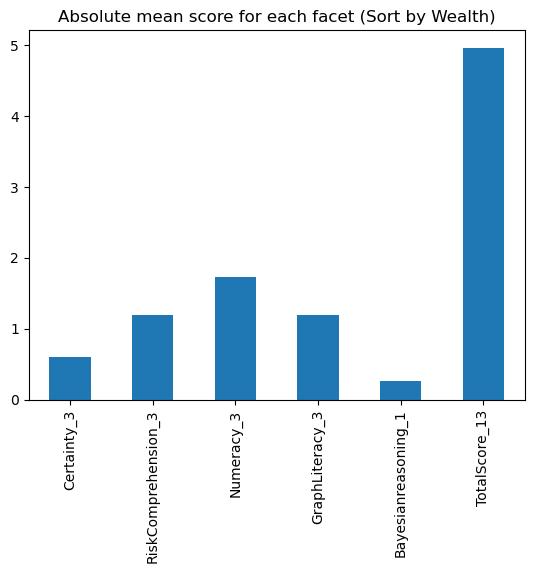

In [28]:
# Absolute mean score for each facet (Sort by Wealth)

df4[['Certainty_3','RiskComprehension_3','Numeracy_3','GraphLiteracy_3','Bayesianreasoning_1','TotalScore_13']].mean(axis = 0).plot(kind = 'bar', title = 'Absolute mean score for each facet (Sort by Wealth)')

<Axes: title={'center': 'Normalised mean score for each facet (Sort by Wealth)'}>

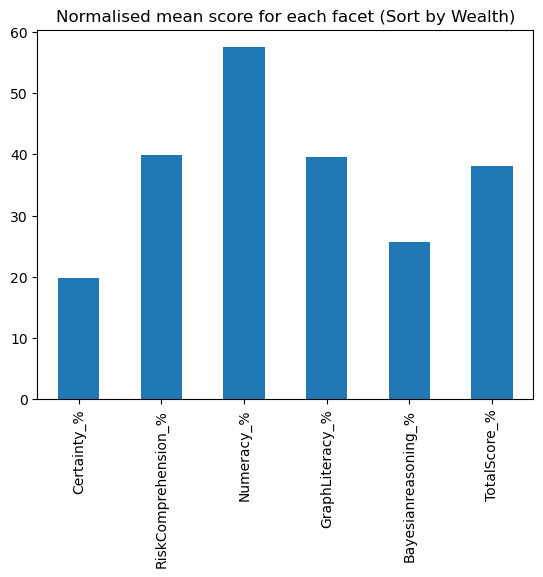

In [29]:
# Normalised mean score for each facet (Sort by Wealth)

(df4[['Certainty_%','RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%','TotalScore_%']].mean(axis = 0)).plot(kind = 'bar', title = 'Normalised mean score for each facet (Sort by Wealth)')

<Axes: title={'center': 'Total responses line plot sorted by Wealth'}, xlabel='Unique responses sorted by wealth', ylabel='TotalScore_13'>

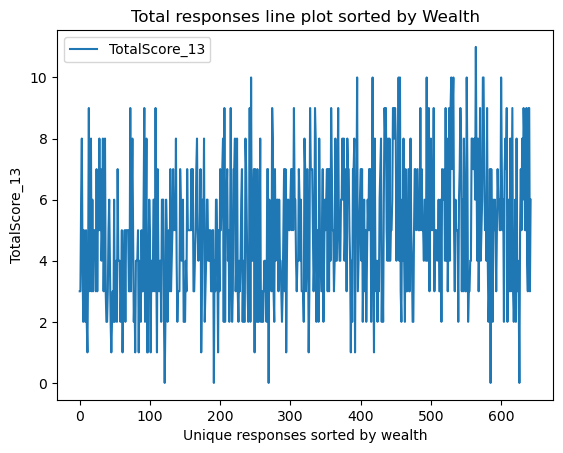

In [30]:
# Line Plot of Absolute Total Facet score vs sorted wealth

df4.plot(use_index = 'True' , kind = 'line', y = ['TotalScore_13'], title = 'Total responses line plot sorted by Wealth',xlabel = 'Unique responses sorted by wealth', ylabel = 'TotalScore_13')

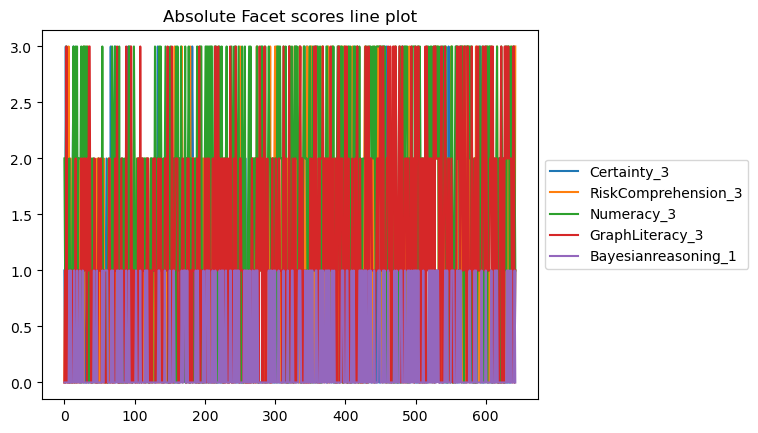

In [31]:
# Absolute Facet scores line plot from low to high wealth 
# I do understand that this is non readable

df4[['Certainty_3','RiskComprehension_3','Numeracy_3','GraphLiteracy_3','Bayesianreasoning_1']].plot( kind = 'line', title = 'Absolute Facet scores line plot', use_index = True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

<Axes: ylabel='TotalScore_13'>

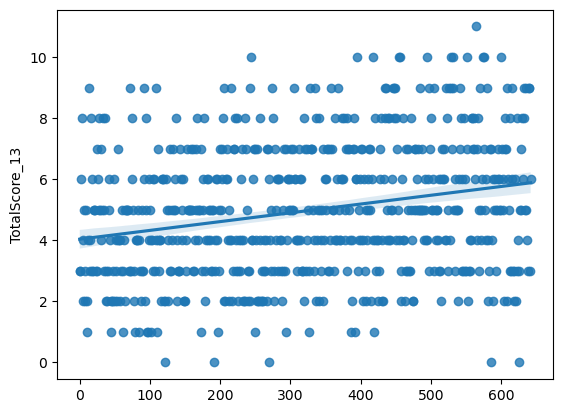

In [32]:
# Trend line for Absolute Total Facet Score vs unique wealth reponses

sns.regplot (data = df4, x = df4.index, y = 'TotalScore_13')

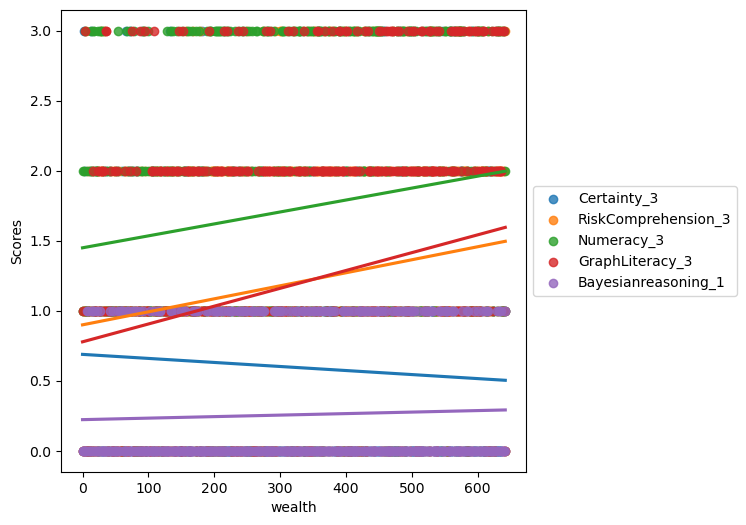

In [33]:
# Trend line for Absolute Independent Facet Score vs wealth reponses

fig1, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4, x = df4.index, y = 'Certainty_3', fit_reg=True, ci=None, ax=ax1, label='Certainty_3')
sns.regplot (data = df4, x = df4.index, y = 'RiskComprehension_3', fit_reg=True, ci=None, ax=ax1, label='RiskComprehension_3')
sns.regplot (data = df4, x = df4.index, y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax1, label='Numeracy_3')
sns.regplot (data = df4, x = df4.index, y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax1, label='GraphLiteracy_3')
sns.regplot (data = df4, x = df4.index, y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax1, label='Bayesianreasoning_1' )

ax1.set(ylabel='Scores', xlabel='wealth')
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [34]:
# Count of number of responses under each quartile

df4.groupby('Quartile Number')[['Quartile Number']].count()

Quartile Number
Quartile Number                 
1                            161
2                            162
3                            159
4                            161

In [35]:
df4.loc[df4['Quartile Number']==1]

ResponseId   age  age_rec  isced  income  wealth  \
0    2rkur9ckjvsyz36zmayz1zw2rkur9ckn  40.5        3      1       3       0   
1    e7ty2tbwa1hcmte7ty683aw64pla7689  30.5        2      2       1       0   
2    y139mcxc619h0ooosy139muk14mpfpvm  30.5        2      3       1       0   
3    pz369rewa2ej3jpz39du46dqedgpnaem  21.5        2      1       2       2   
4    6lyvarwdyk7v7hx2qgs6lyyfqalmor05  30.5        2      1       1       2   
..                                ...   ...      ...    ...     ...     ...   
156  qqsa84yklzt7mi9qqsa9kp15tsjflbpn  30.5        2      2       2  350000   
157  sm67z605u7x7he9zjss0qdbjsm67z6wc  21.5        2      1       3  350000   
158  syhai9qvq3md52xkssyha58qxhgyx7uo  50.5        3      1       1  350000   
159  p7ung37hpf0ejr08izmp7u2wron7wo0a  50.5        3      2       2  350000   
160  iywefc200664a8s19oq3viywefc2zav5  40.5        3      1       2  350000   

     Certainty_3  RiskComprehension_3  GraphLiteracy_3  Numeracy_3  \
0              1                    0                0           2   
1              0                    1                1           1   
2              3                    1                0           2   
3              1                    1                3           3   
4              2                    1                0           1   
..           ...                  ...              ...         ...   
156            0                    1                1           2   
157            1                    3                1           0   
158            0                    1                2           2   
159            1                    1                2           3   
160            2                    1                2           0   

     Bayesianreasoning_1  Certainty_%  RiskComprehension_%  GraphLiteracy_%  \
0                      0    33.333333             0.000000         0.000000   
1                      0     0.000000            33.333333        33.333333   
2                      0   100.000000            33.333333         0.000000   
3                      0    33.333333            33.333333       100.000000   
4                      0    66.666667            33.333333         0.000000   
..                   ...          ...                  ...              ...   
156                    1     0.000000            33.333333        33.333333   
157                    0    33.333333           100.000000        33.333333   
158                    0     0.000000            33.333333        66.666667   
159                    0    33.333333            33.333333        66.666667   
160                    0    66.666667            33.333333        66.666667   

     Numeracy_%  Bayesianreasoning_%  TotalScore_13  TotalScore_%  \
0     66.666667                  0.0              3     23.076923   
1     33.333333                  0.0              3     23.076923   
2     66.666667                  0.0              6     46.153846   
3    100.000000                  0.0              8     61.538462   
4     33.333333                  0.0              4     30.769231   
..          ...                  ...            ...           ...   
156   66.666667                100.0              5     38.461538   
157    0.000000                  0.0              5     38.461538   
158   66.666667                  0.0              5     38.461538   
159  100.000000                  0.0              7     53.846154   
160    0.000000                  0.0              5     38.461538   

     Quartile Number  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
..               ...  
156                1  
157                1  
158                1  
159                1  
160                1  

[161 rows x 19 columns]

<Axes: title={'center': 'Total Score line plot sorted by Wealth Q1'}, xlabel='Unique responses', ylabel='TotalScore_13'>

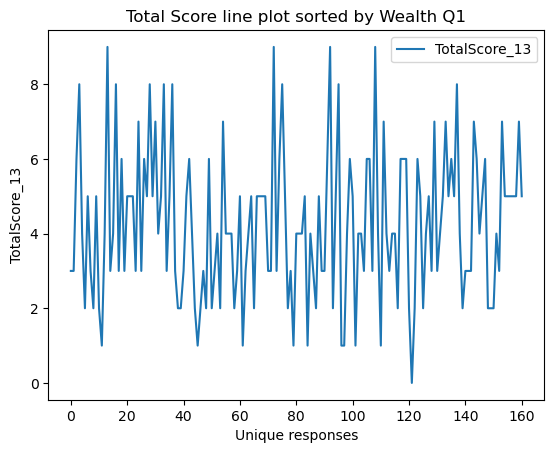

In [36]:
# This graph is basically a line plot of the TotalScore_13 across first quartile unique responses which are ordered by income

df4.loc[df4['Quartile Number']==1].plot(use_index = 'True' , kind = 'line', y = ['TotalScore_13'], title = 'Total Score line plot sorted by Wealth Q1',xlabel = 'Unique responses', ylabel = 'TotalScore_13')

<Axes: ylabel='TotalScore_13'>

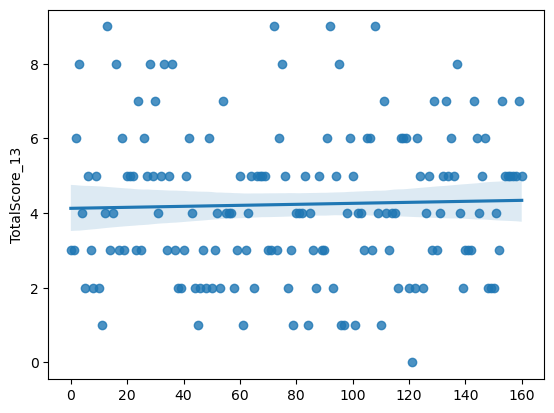

In [37]:
# Trend line for Absolute Total Facet Score vs unique Q14. Income reponses in Quartile 1

sns.regplot (data = df4.loc[df4['Quartile Number']==1], x = df4.loc[df4['Quartile Number']==1].index, y = 'TotalScore_13')

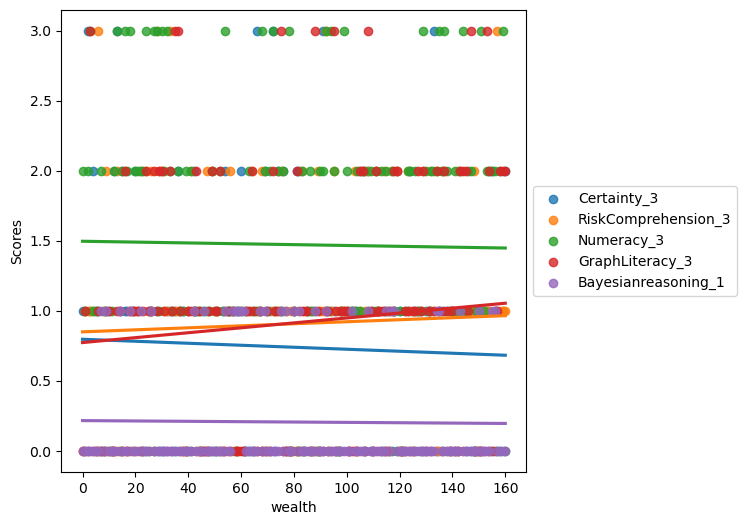

In [38]:
# Trend line for Absolute Independent Facet Score vs wealth reponses in Quartile 1

fig1, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[df4['Quartile Number']==1], x = df4.loc[df4['Quartile Number']==1].index, y = 'Certainty_3', fit_reg=True, ci=None, ax=ax2, label='Certainty_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==1], x = df4.loc[df4['Quartile Number']==1].index, y = 'RiskComprehension_3', fit_reg=True, ci=None, ax=ax2, label='RiskComprehension_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==1], x = df4.loc[df4['Quartile Number']==1].index, y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax2, label='Numeracy_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==1], x = df4.loc[df4['Quartile Number']==1].index, y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax2, label='GraphLiteracy_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==1], x = df4.loc[df4['Quartile Number']==1].index, y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax2, label='Bayesianreasoning_1' )

ax2.set(ylabel='Scores', xlabel='wealth')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [39]:
df4.loc[df4['Quartile Number']==2]

ResponseId   age  age_rec  isced  income   wealth  \
161  pjshk87e5oqn7cvxupjshkblv1rdybkl  40.5        3      3       1   357000   
162  mm9er7zx3n18o3lmlgmm9erc50lbg3qs  40.5        3      1       1   375000   
163  ht7ctpj695gzyrjbt8adwu5eht7ctpj6  40.5        3      2       1   380000   
164  nomuxcrlfa5gta9qndnomuxcvravzzyh  40.5        3      2       1   380000   
165  k2rqe0t5rjl9kb0pk2rqeqqojp9lytra  30.5        2      1       2   399000   
..                                ...   ...      ...    ...     ...      ...   
318  kkrvshmue24jtdtwj8qkkrvd0jnsfbgx  30.5        2      1       3  1200000   
319  5zf57p6w5606c4ifg3j5zf57pc53olwd  30.5        2      1       2  1200000   
320  8osegw7cma9bwcnp1rze8os0i7fdhvm7  30.5        2      1       2  1200000   
321  24leb8928zk3nvdsb6gll24lebvjrvvk  30.5        2      1       5  1200000   
322  9womeewucr9fx6d29womedb3b0jtnum6  30.5        2      1       2  1200000   

     Certainty_3  RiskComprehension_3  GraphLiteracy_3  Numeracy_3  \
161            0                    2                2           3   
162            0                    2                0           1   
163            0                    2                0           1   
164            0                    2                0           2   
165            2                    1                1           1   
..           ...                  ...              ...         ...   
318            0                    0                1           1   
319            0                    1                1           0   
320            0                    2                3           3   
321            0                    3                1           3   
322            1                    1                0           1   

     Bayesianreasoning_1  Certainty_%  RiskComprehension_%  GraphLiteracy_%  \
161                    0     0.000000            66.666667        66.666667   
162                    0     0.000000            66.666667         0.000000   
163                    0     0.000000            66.666667         0.000000   
164                    0     0.000000            66.666667         0.000000   
165                    0    66.666667            33.333333        33.333333   
..                   ...          ...                  ...              ...   
318                    1     0.000000             0.000000        33.333333   
319                    0     0.000000            33.333333        33.333333   
320                    0     0.000000            66.666667       100.000000   
321                    0     0.000000           100.000000        33.333333   
322                    0    33.333333            33.333333         0.000000   

     Numeracy_%  Bayesianreasoning_%  TotalScore_13  TotalScore_%  \
161  100.000000                  0.0              7     53.846154   
162   33.333333                  0.0              3     23.076923   
163   33.333333                  0.0              3     23.076923   
164   66.666667                  0.0              4     30.769231   
165   33.333333                  0.0              5     38.461538   
..          ...                  ...            ...           ...   
318   33.333333                100.0              3     23.076923   
319    0.000000                  0.0              2     15.384615   
320  100.000000                  0.0              8     61.538462   
321  100.000000                  0.0              7     53.846154   
322   33.333333                  0.0              3     23.076923   

     Quartile Number  
161                2  
162                2  
163                2  
164                2  
165                2  
..               ...  
318                2  
319                2  
320                2  
321                2  
322                2  

[162 rows x 19 columns]

<Axes: title={'center': 'Total Score line plot sorted by Wealth Q1'}, xlabel='Unique responses', ylabel='TotalScore_13'>

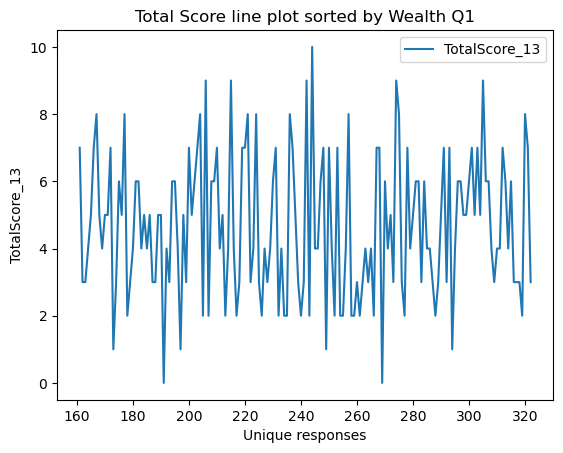

In [40]:
# This graph is basically a line plot of the TotalScore_13 across second quartile unique responses which are ordered by income

df4.loc[df4['Quartile Number']==2].plot(use_index = 'True' , kind = 'line', y = ['TotalScore_13'], title = 'Total Score line plot sorted by Wealth Q1',xlabel = 'Unique responses', ylabel = 'TotalScore_13')

<Axes: ylabel='TotalScore_13'>

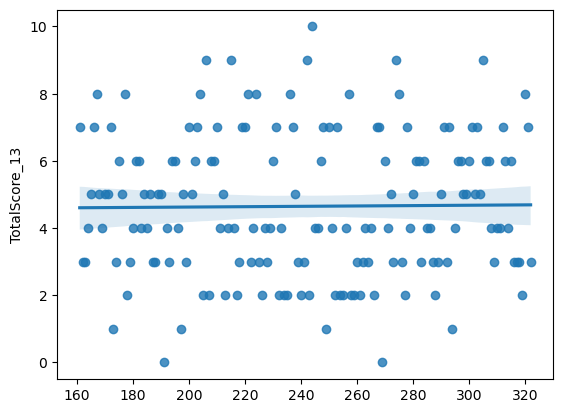

In [41]:
# Trend line for Absolute Total Facet Score vs unique wealth reponses in Quartile 2

sns.regplot (data = df4.loc[df4['Quartile Number']==2], x = df4.loc[df4['Quartile Number']==2].index, y = 'TotalScore_13')

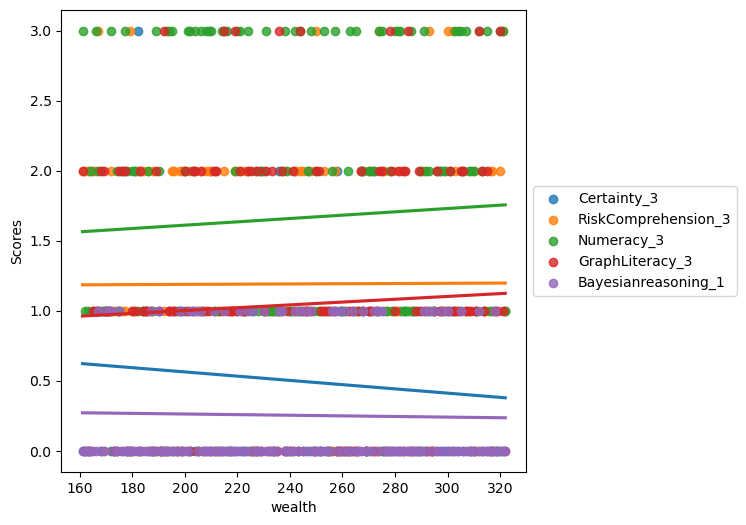

In [42]:
# Trend line for Absolute Independent Facet Score vs wealth reponses in Quartile 2

fig1, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[df4['Quartile Number']==2], x = df4.loc[df4['Quartile Number']==2].index, y = 'Certainty_3', fit_reg=True, ci=None, ax=ax3, label='Certainty_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==2], x = df4.loc[df4['Quartile Number']==2].index, y = 'RiskComprehension_3', fit_reg=True, ci=None, ax=ax3, label='RiskComprehension_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==2], x = df4.loc[df4['Quartile Number']==2].index, y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax3, label='Numeracy_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==2], x = df4.loc[df4['Quartile Number']==2].index, y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax3, label='GraphLiteracy_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==2], x = df4.loc[df4['Quartile Number']==2].index, y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax3, label='Bayesianreasoning_1' )

ax3.set(ylabel='Scores', xlabel='wealth')
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [43]:
df4.loc[df4['Quartile Number']==3]

ResponseId   age  age_rec  isced  income   wealth  \
323  7vxwfvymsyuult211ipu7vxwfvqhdcq7  50.5        3      2       2  1250000   
324  z1yuu5oonxkvix25a7z1yuugo790vc38  21.5        2      2       2  1250000   
325  odfxscnhx6pz1ptrodfxs46gbnyv7ntb  60.5        4      1       2  1250000   
326  mck3u15th9xjqtg40mck301n03zilmrq  30.5        2      1       3  1280000   
327  lmf40pcjk28ect1hxa0xlmf40phmawgq  30.5        2      1       3  1300000   
..                                ...   ...      ...    ...     ...      ...   
477  gpm3fq7g5uy9k9zttsvgpm3fkzsitz4q  30.5        2      1       2  5000000   
478  bg1xhvcrxugb6h19vbg1psootbgcpo45  40.5        3      2       2  5000000   
479  e0ingnzzvib38goe0ingbhmr92mkjker  30.5        2      1       3  5000000   
480  nvwubouqvv6a9psx6nvwub352o8bqowj  21.5        2      1       4  5000000   
481  obftinjncjw2fkari22ghobfti6alubg  30.5        2      1       3  5200000   

     Certainty_3  RiskComprehension_3  GraphLiteracy_3  Numeracy_3  \
323            1                    1                0           2   
324            0                    2                1           3   
325            0                    1                2           1   
326            1                    0                0           0   
327            1                    0                0           2   
..           ...                  ...              ...         ...   
477            0                    1                3           3   
478            0                    2                1           3   
479            2                    2                0           0   
480            0                    1                2           2   
481            0                    1                3           3   

     Bayesianreasoning_1  Certainty_%  RiskComprehension_%  GraphLiteracy_%  \
323                    0    33.333333            33.333333         0.000000   
324                    1     0.000000            66.666667        33.333333   
325                    1     0.000000            33.333333        66.666667   
326                    0    33.333333             0.000000         0.000000   
327                    0    33.333333             0.000000         0.000000   
..                   ...          ...                  ...              ...   
477                    0     0.000000            33.333333       100.000000   
478                    1     0.000000            66.666667        33.333333   
479                    1    66.666667            66.666667         0.000000   
480                    1     0.000000            33.333333        66.666667   
481                    0     0.000000            33.333333       100.000000   

     Numeracy_%  Bayesianreasoning_%  TotalScore_13  TotalScore_%  \
323   66.666667                  0.0              4     30.769231   
324  100.000000                100.0              7     53.846154   
325   33.333333                100.0              5     38.461538   
326    0.000000                  0.0              1      7.692308   
327   66.666667                  0.0              3     23.076923   
..          ...                  ...            ...           ...   
477  100.000000                  0.0              7     53.846154   
478  100.000000                100.0              7     53.846154   
479    0.000000                100.0              5     38.461538   
480   66.666667                100.0              6     46.153846   
481  100.000000                  0.0              7     53.846154   

     Quartile Number  
323                3  
324                3  
325                3  
326                3  
327                3  
..               ...  
477                3  
478                3  
479                3  
480                3  
481                3  

[159 rows x 19 columns]

<Axes: title={'center': 'Total Score line plot sorted by Wealth Q3'}, xlabel='Unique responses', ylabel='TotalScore_13'>

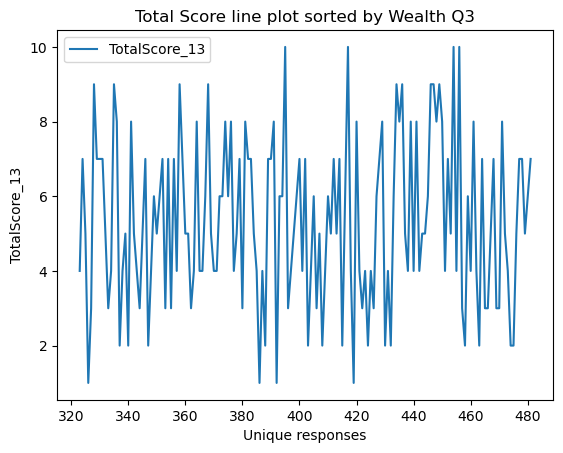

In [44]:
# This graph is basically a line plot of the TotalScore_13 across third quartile unique responses which are ordered by wealth

df4.loc[df4['Quartile Number']==3].plot(use_index = 'True' , kind = 'line', y = ['TotalScore_13'], title = 'Total Score line plot sorted by Wealth Q3',xlabel = 'Unique responses', ylabel = 'TotalScore_13')

<Axes: ylabel='TotalScore_13'>

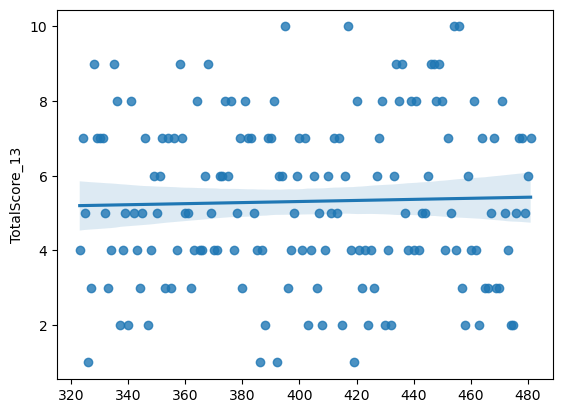

In [45]:
# Trend line for Absolute Total Facet Score vs unique wealth reponses in Quartile 3

sns.regplot (data = df4.loc[df4['Quartile Number']==3], x = df4.loc[df4['Quartile Number']==3].index, y = 'TotalScore_13')

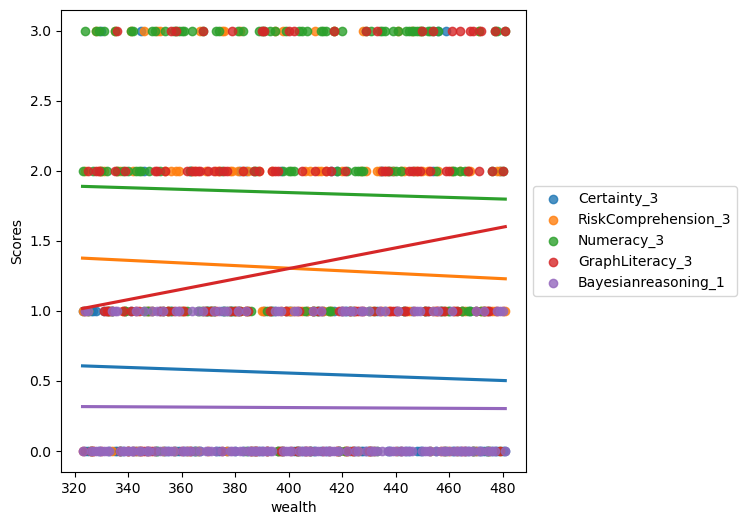

In [46]:
# Trend line for Absolute Independent Facet Score vs wealth reponses in Quartile 3

fig1, ax4 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[df4['Quartile Number']==3], x = df4.loc[df4['Quartile Number']==3].index, y = 'Certainty_3', fit_reg=True, ci=None, ax=ax4, label='Certainty_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==3], x = df4.loc[df4['Quartile Number']==3].index, y = 'RiskComprehension_3', fit_reg=True, ci=None, ax=ax4, label='RiskComprehension_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==3], x = df4.loc[df4['Quartile Number']==3].index, y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax4, label='Numeracy_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==3], x = df4.loc[df4['Quartile Number']==3].index, y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax4, label='GraphLiteracy_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==3], x = df4.loc[df4['Quartile Number']==3].index, y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax4, label='Bayesianreasoning_1' )

ax4.set(ylabel='Scores', xlabel='wealth')
ax4.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [47]:
df4.loc[df4['Quartile Number']==4]

ResponseId   age  age_rec  isced  income  \
482  rh3ida1re0oohl9crh3ida1s6gcynlil  30.5        2      1       4   
483  fa4fw88qzaxzjxw31rzchtfa4fw8gn8h  30.5        2      1       3   
484  8pwy5gq2mcpugpldx8pwy5javd312pha  30.5        2      1       3   
485  gdsir9721na619gpfsu9jqk7bi4rhpfs  30.5        2      2       3   
486  ks6mtnxelurtt3m3uihks6mtnlo5k2i3  30.5        2      2       1   
..                                ...   ...      ...    ...     ...   
638  35zux4sc18rplyz3dc85z35zux4sdfm4  21.5        2      2       4   
639  wn9mk6m1k8o10l1twn9mk6b4z7l7yvhc  50.5        3      1       3   
640  oczyh23wpxpk4o0teoczy5zzzng3i6kk  30.5        2      2       5   
641  4udfypw7lf8mmgjmxr4d4udfym4sx1sf  40.5        3      1       3   
642  zcj7ldokhyo6217f9sriwizcj7ldodwt  40.5        3      2       3   

        wealth  Certainty_3  RiskComprehension_3  GraphLiteracy_3  Numeracy_3  \
482    5245899            3                    0                1           1   
483    5500000            2                    1                0           2   
484    5500000            1                    1                0           3   
485    5500000            1                    3                2           2   
486    5800000            0                    0                2           3   
..         ...          ...                  ...              ...         ...   
638  500000000            1                    1                0           1   
639  500000000            1                    2                3           3   
640  500000000            1                    2                3           3   
641  500000000            0                    0                0           2   
642  600000000            1                    3                1           1   

     Bayesianreasoning_1  Certainty_%  RiskComprehension_%  GraphLiteracy_%  \
482                    0   100.000000             0.000000        33.333333   
483                    0    66.666667            33.333333         0.000000   
484                    0    33.333333            33.333333         0.000000   
485                    1    33.333333           100.000000        66.666667   
486                    0     0.000000             0.000000        66.666667   
..                   ...          ...                  ...              ...   
638                    0    33.333333            33.333333         0.000000   
639                    0    33.333333            66.666667       100.000000   
640                    0    33.333333            66.666667       100.000000   
641                    1     0.000000             0.000000         0.000000   
642                    0    33.333333           100.000000        33.333333   

     Numeracy_%  Bayesianreasoning_%  TotalScore_13  TotalScore_%  \
482   33.333333                  0.0              5     38.461538   
483   66.666667                  0.0              5     38.461538   
484  100.000000                  0.0              5     38.461538   
485   66.666667                100.0              9     69.230769   
486  100.000000                  0.0              5     38.461538   
..          ...                  ...            ...           ...   
638   33.333333                  0.0              3     23.076923   
639  100.000000                  0.0              9     69.230769   
640  100.000000                  0.0              9     69.230769   
641   66.666667                100.0              3     23.076923   
642   33.333333                  0.0              6     46.153846   

     Quartile Number  
482                4  
483                4  
484                4  
485                4  
486                4  
..               ...  
638                4  
639                4  
640                4  
641                4  
642                4  

[161 rows x 19 columns]

<Axes: title={'center': 'Total Score line plot sorted by Wealth Q4'}, xlabel='Unique responses', ylabel='TotalScore_13'>

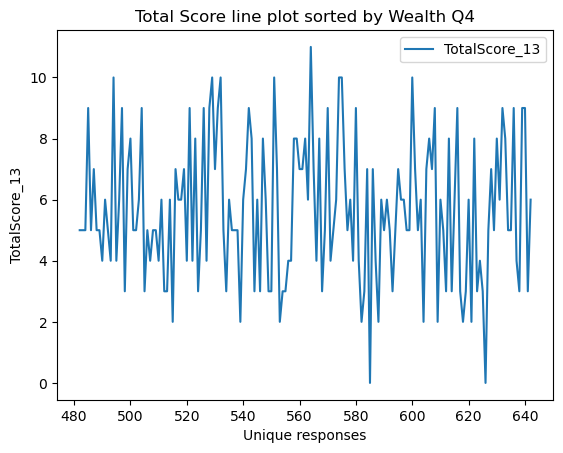

In [48]:
# This graph is basically a line plot of the TotalScore_13 across fourth quartile unique responses which are ordered by Wealth

df4.loc[df4['Quartile Number']==4].plot(use_index = 'True' , kind = 'line', y = ['TotalScore_13'], title = 'Total Score line plot sorted by Wealth Q4',xlabel = 'Unique responses', ylabel = 'TotalScore_13')

<Axes: ylabel='TotalScore_13'>

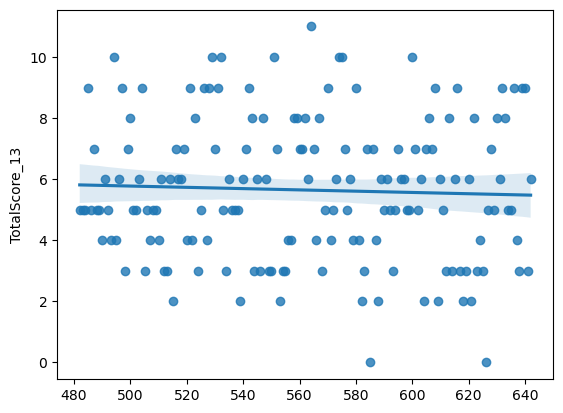

In [49]:
# Trend line for Absolute Total Facet Score vs unique wealth reponses in Quartile 4

sns.regplot (data = df4.loc[df4['Quartile Number']==4], x = df4.loc[df4['Quartile Number']==4].index, y = 'TotalScore_13')

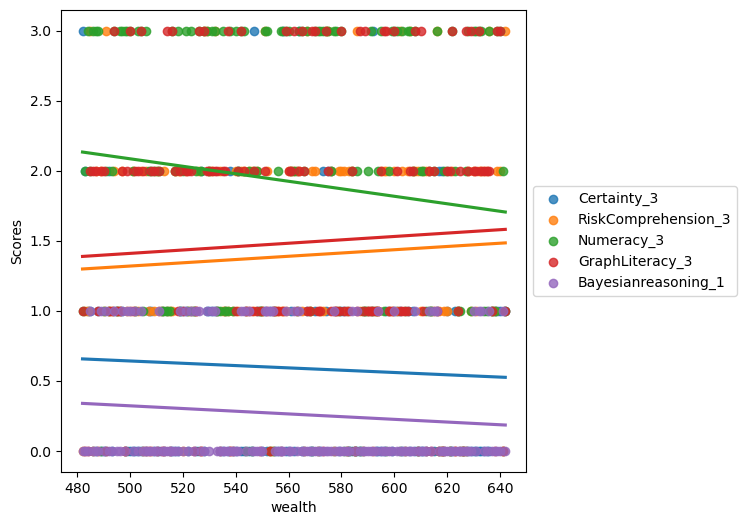

In [50]:
# Trend line for Absolute Independent Facet Score vs wealth reponses in Quartile 4

fig1, ax5 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[df4['Quartile Number']==4], x = df4.loc[df4['Quartile Number']==4].index, y = 'Certainty_3', fit_reg=True, ci=None, ax=ax5, label='Certainty_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==4], x = df4.loc[df4['Quartile Number']==4].index, y = 'RiskComprehension_3', fit_reg=True, ci=None, ax=ax5, label='RiskComprehension_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==4], x = df4.loc[df4['Quartile Number']==4].index, y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax5, label='Numeracy_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==4], x = df4.loc[df4['Quartile Number']==4].index, y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax5, label='GraphLiteracy_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==4], x = df4.loc[df4['Quartile Number']==4].index, y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax5, label='Bayesianreasoning_1' )

ax5.set(ylabel='Scores', xlabel='wealth')
ax5.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

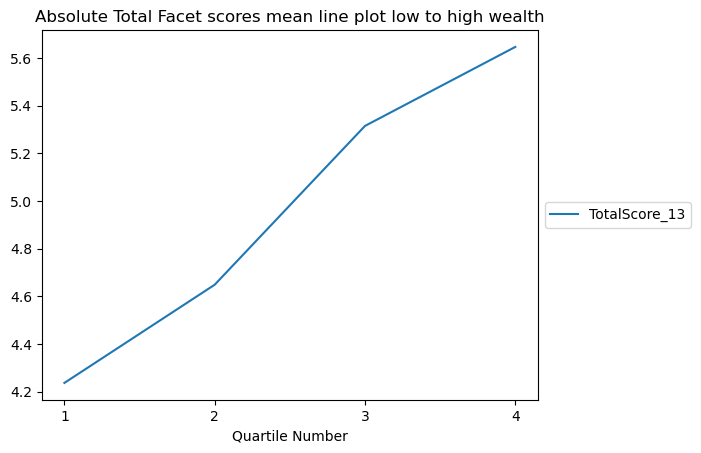

In [51]:
# Absolute Total Facet scores mean line plot from low to high Wealth

df4.groupby('Quartile Number')[['TotalScore_13']].mean().plot( kind = 'line', title = 'Absolute Total Facet scores mean line plot low to high wealth', xticks = np.arange(1,5,step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

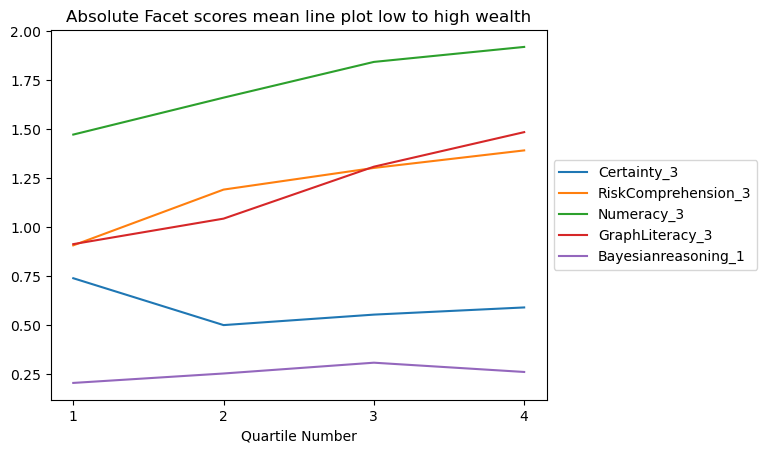

In [52]:
# Absolute Facet scores mean line plot from low to high wealth

df4.groupby('Quartile Number')[['Certainty_3','RiskComprehension_3','Numeracy_3','GraphLiteracy_3','Bayesianreasoning_1']].mean().plot( kind = 'line', title = 'Absolute Facet scores mean line plot low to high wealth', xticks = np.arange(1,5,step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

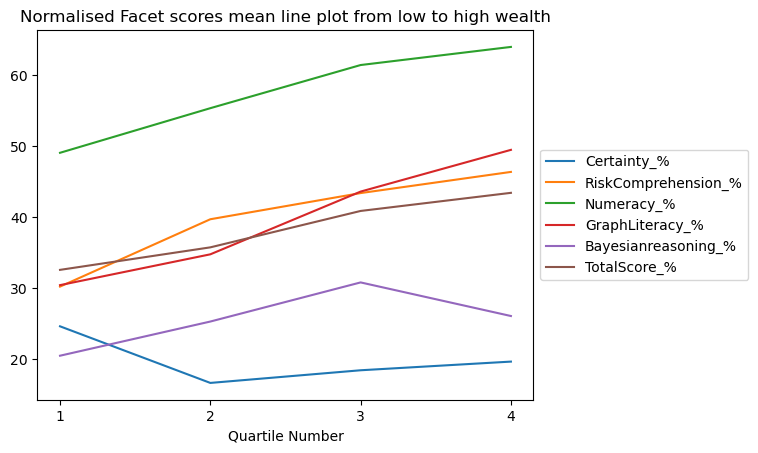

In [53]:
# Normalised Facet scores mean line plot from low to high wealth


df4.groupby('Quartile Number')[['Certainty_%','RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%','TotalScore_%']].mean().plot( kind = 'line', title = 'Normalised Facet scores mean line plot from low to high wealth',  xticks = np.arange(1,5,step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

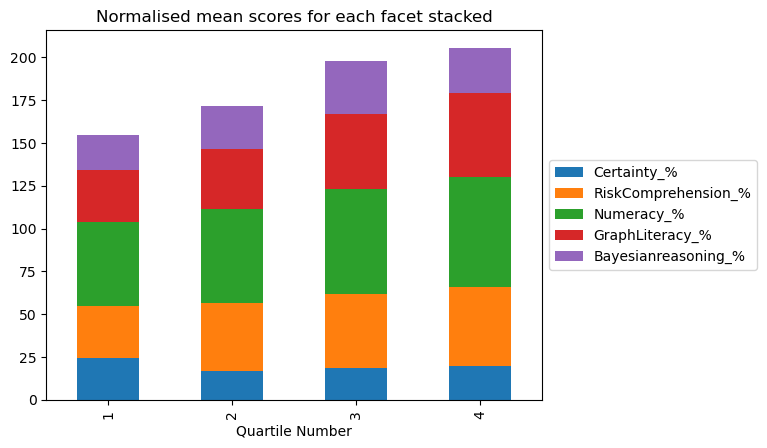

In [54]:
# Normalised mean scores for each facet stacked

df4.groupby('Quartile Number')[['Certainty_%','RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%']].mean().plot( kind = 'bar', title = 'Normalised mean scores for each facet stacked', stacked = True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

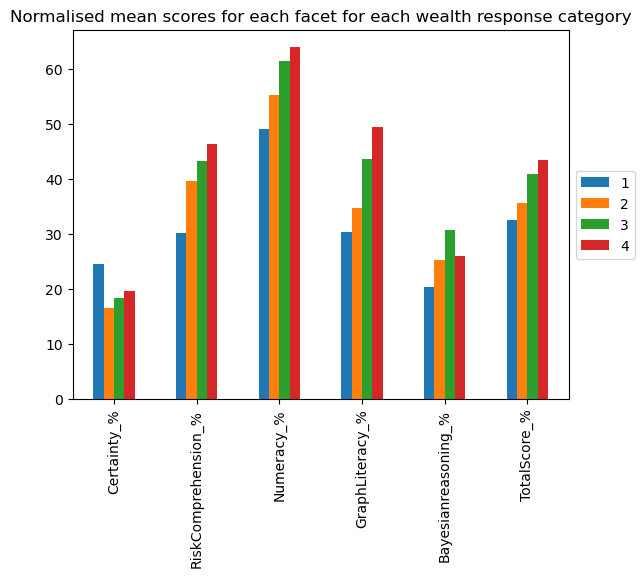

In [55]:
# Normalised mean scores for each facet for each wealth response Quartile

df4.groupby('Quartile Number')[['Certainty_%','RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%','TotalScore_%']].mean().T.plot(kind = 'bar', title = 'Normalised mean scores for each facet for each wealth response category').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

<Axes: xlabel='Quartile Number', ylabel='TotalScore_13'>

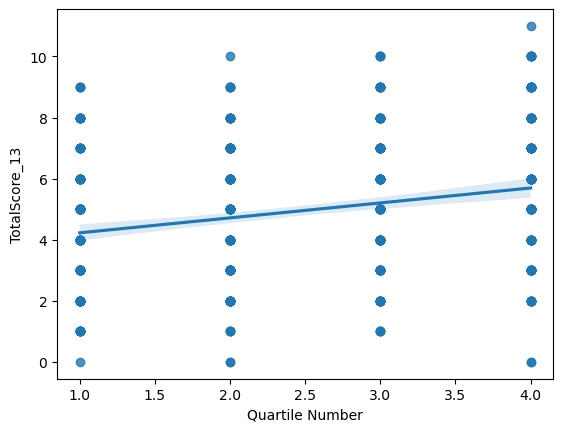

In [56]:
# Trend line for Absolute Total Facet Score vs Quartiles

sns.regplot (data = df4, x = 'Quartile Number', y = 'TotalScore_13')

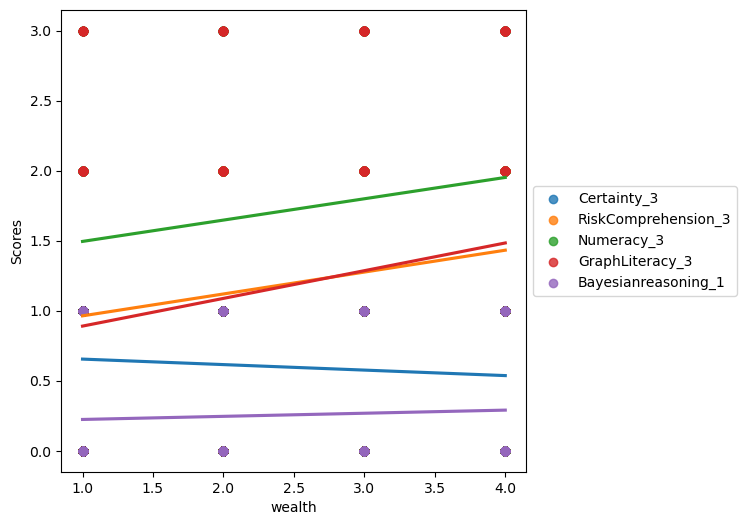

In [57]:
# Trend line for Absolute Independent Facet Score vs Quartiles

fig2, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4, x = 'Quartile Number', y = 'Certainty_3', fit_reg=True, ci=None, ax=ax2, label='Certainty_3')
sns.regplot (data = df4, x = 'Quartile Number', y = 'RiskComprehension_3', fit_reg=True, ci=None, ax=ax2, label='RiskComprehension_3')
sns.regplot (data = df4, x = 'Quartile Number', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax2, label='Numeracy_3')
sns.regplot (data = df4, x = 'Quartile Number', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax2, label='GraphLiteracy_3')
sns.regplot (data = df4, x = 'Quartile Number', y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax2, label='Bayesianreasoning_1' )

ax2.set(ylabel='Scores', xlabel='wealth')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

<Axes: xlabel='Quartile Number', ylabel='TotalScore_13'>

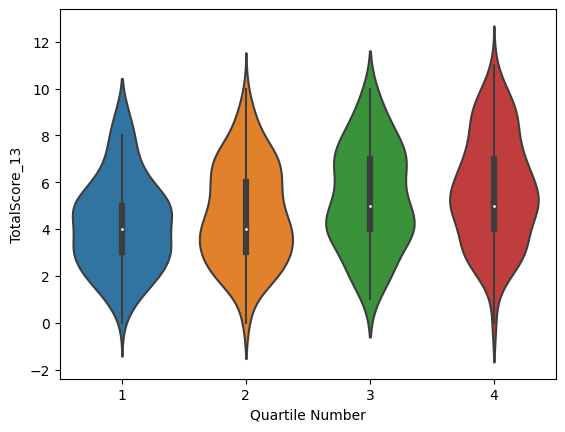

In [58]:
# Violine Plot for TotalScore_13 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'TotalScore_13')

<Axes: xlabel='Quartile Number', ylabel='Certainty_3'>

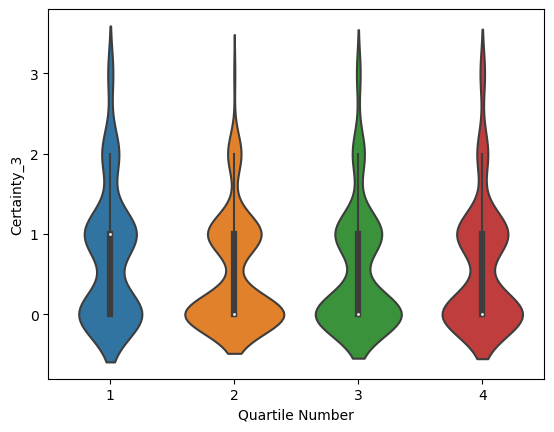

In [59]:
# Violine Plot for Certainty_3 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'Certainty_3')

<Axes: xlabel='Quartile Number', ylabel='RiskComprehension_3'>

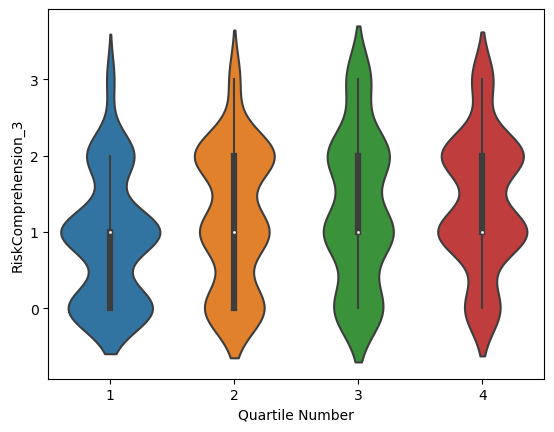

In [60]:
# Violine Plot for RiskComprehension_3 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'RiskComprehension_3')

<Axes: xlabel='Quartile Number', ylabel='GraphLiteracy_3'>

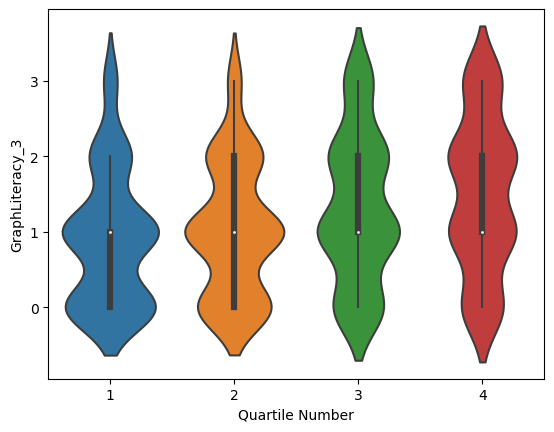

In [61]:
# Violine Plot for GraphLiteracy_3 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'GraphLiteracy_3')

<Axes: xlabel='Quartile Number', ylabel='Numeracy_3'>

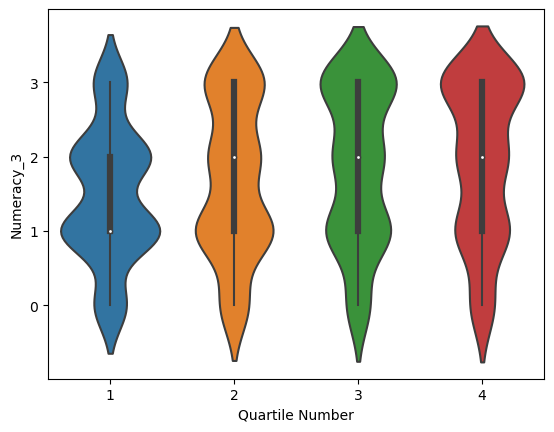

In [62]:
# Violine Plot for Numeracy_3 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'Numeracy_3')

<Axes: xlabel='Quartile Number', ylabel='Bayesianreasoning_1'>

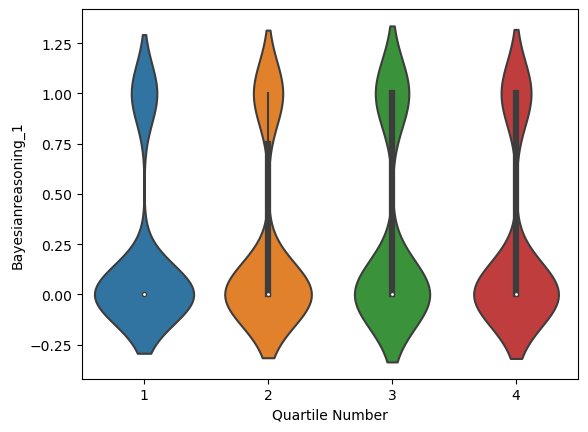

In [63]:
# Violine Plot for Bayesianreasoning_1 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'Bayesianreasoning_1')

In [64]:
# Data Frame 5 or df5 is an aggregate data on facet total scores and over all total score, along with  education data vs each response. 
# This data set is now sorted by education.

df5 = df2.sort_values(by = 'isced')
df5 = df5.reset_index(drop = True)

df5

ResponseId   age  age_rec  isced  income    wealth  \
0    ztfdlcbiyo1xco3ztfdl4ozqpte2q3m9  30.5        2      1       3   5000000   
1    ten07h1k6r3hqcfqten07isxh8g3c7sd  30.5        2      1       2    500000   
2    h5ngv0k7kcqx5i5qoftgxh5ngv0k7fvv  30.5        2      1       2    500000   
3    h5n6a65bgsz5w1mi1inh5n6a7l54vger  40.5        3      1       2     30000   
4    tftzv0n6j9gvvxwm68xtftzv0hvv1e1m  30.5        2      1       5  20000000   
..                                ...   ...      ...    ...     ...       ...   
638  y139mcxc619h0ooosy139muk14mpfpvm  30.5        2      3       1         0   
639  mj52mssq166g3wubcnkmj520tfdzf8oz  40.5        3      3       1      2000   
640  a31qwuv5yj3n5tlmea3183d7y7salhcl  30.5        2      3       1   5000000   
641  870h2qs77chp1cd5q870n4fnkjbrxezk  21.5        2      3       2    150000   
642  t1hiz7zjzou3pfd59pqt1hizrglay7e5  40.5        3      3       1    200000   

     Certainty_3  RiskComprehension_3  GraphLiteracy_3  Numeracy_3  \
0              1                    2                1           3   
1              0                    0                0           3   
2              1                    2                0           0   
3              1                    1                3           0   
4              0                    0                0           0   
..           ...                  ...              ...         ...   
638            3                    1                0           2   
639            1                    1                1           2   
640            0                    1                0           2   
641            0                    1                0           0   
642            1                    1                2           1   

     Bayesianreasoning_1  Certainty_%  RiskComprehension_%  GraphLiteracy_%  \
0                      0    33.333333            66.666667        33.333333   
1                      0     0.000000             0.000000         0.000000   
2                      0    33.333333            66.666667         0.000000   
3                      0    33.333333            33.333333       100.000000   
4                      0     0.000000             0.000000         0.000000   
..                   ...          ...                  ...              ...   
638                    0   100.000000            33.333333         0.000000   
639                    0    33.333333            33.333333        33.333333   
640                    0     0.000000            33.333333         0.000000   
641                    0     0.000000            33.333333         0.000000   
642                    0    33.333333            33.333333        66.666667   

     Numeracy_%  Bayesianreasoning_%  TotalScore_13  TotalScore_%  
0    100.000000                  0.0              7     53.846154  
1    100.000000                  0.0              3     23.076923  
2      0.000000                  0.0              3     23.076923  
3      0.000000                  0.0              5     38.461538  
4      0.000000                  0.0              0      0.000000  
..          ...                  ...            ...           ...  
638   66.666667                  0.0              6     46.153846  
639   66.666667                  0.0              5     38.461538  
640   66.666667                  0.0              3     23.076923  
641    0.000000                  0.0              1      7.692308  
642   33.333333                  0.0              5     38.461538  

[643 rows x 18 columns]

In [65]:
# since we didnt drop any values, the dataset is essentially the same as df2, but sorted

In [66]:
# Mean of each facet as a % for each category of isced

df5.groupby('isced')[['Certainty_%','RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%']].mean()

Certainty_%  RiskComprehension_%  Numeracy_%  GraphLiteracy_%  \
isced                                                                  
1        19.423868            39.588477   56.707819        40.000000   
2        19.444444            41.512346   59.259259        39.351852   
3        31.818182            30.303030   53.030303        33.333333   

       Bayesianreasoning_%  
isced                       
1                24.444444  
2                29.629630  
3                 9.090909

In [67]:
# Count of responses for each category isced

df5.groupby('isced')[['ResponseId']].count()

ResponseId
isced            
1             405
2             216
3              22

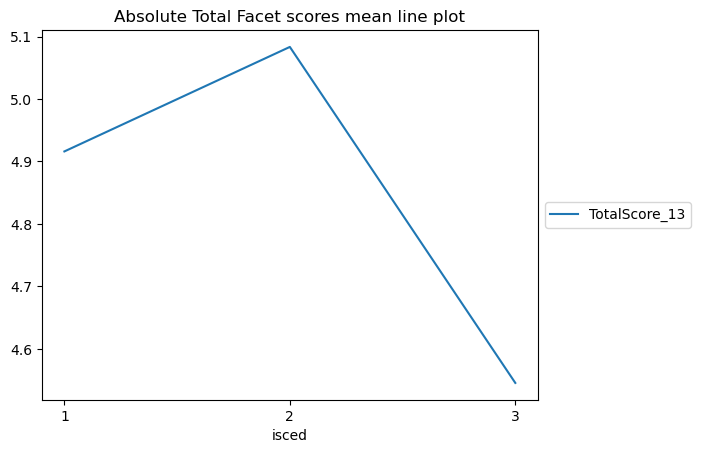

In [68]:
# Absolute Total Facet scores mean line plot from low to high education

df5.groupby('isced')[['TotalScore_13']].mean().plot( kind = 'line', title = 'Absolute Total Facet scores mean line plot', xticks = np.arange(1,4, step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

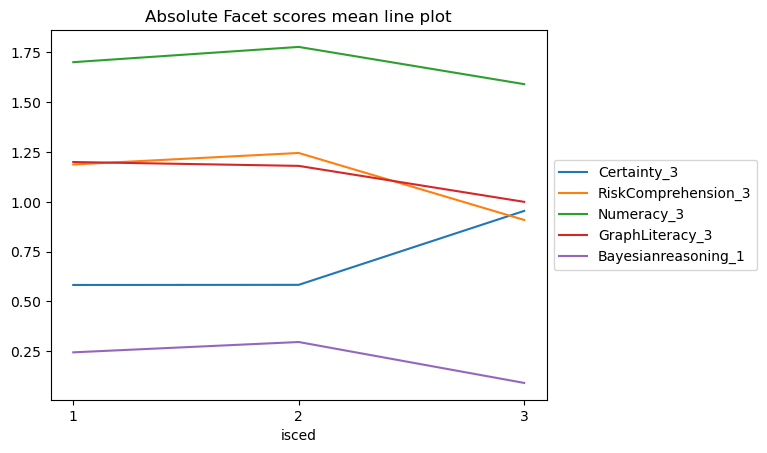

In [69]:
# Absolute Facet scores mean line plot from low to high edu

df5.groupby('isced')[['Certainty_3','RiskComprehension_3','Numeracy_3','GraphLiteracy_3','Bayesianreasoning_1']].mean().plot( kind = 'line', title = 'Absolute Facet scores mean line plot', xticks = np.arange(1,4, step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

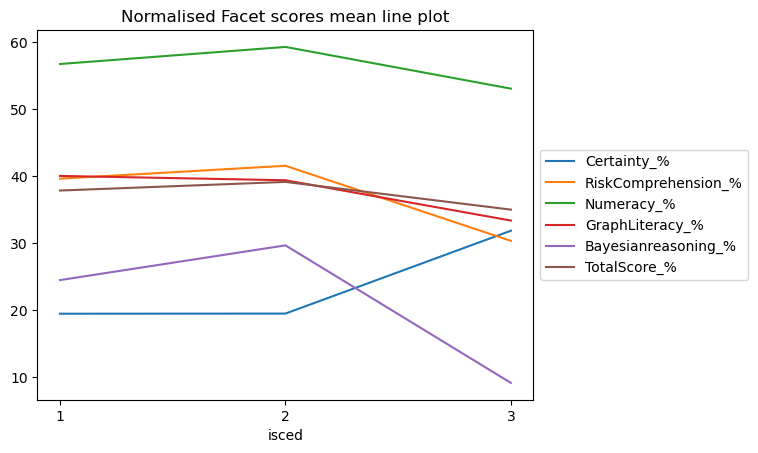

In [70]:
# Normalised Facet scores mean line plot from low to high edu


df5.groupby('isced')[['Certainty_%','RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%','TotalScore_%']].mean().plot( kind = 'line', title = 'Normalised Facet scores mean line plot', xticks = np.arange(1,4, step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

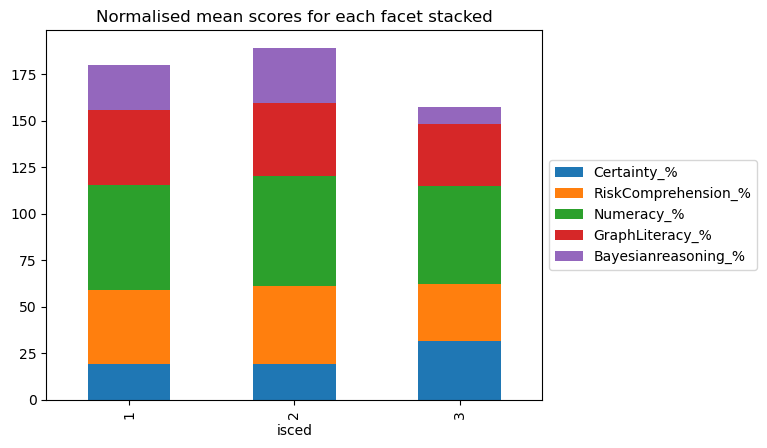

In [71]:
# Normalised mean scores for each facet stacked

df5.groupby('isced')[['Certainty_%','RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%']].mean().plot( kind = 'bar', title = 'Normalised mean scores for each facet stacked', stacked = True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

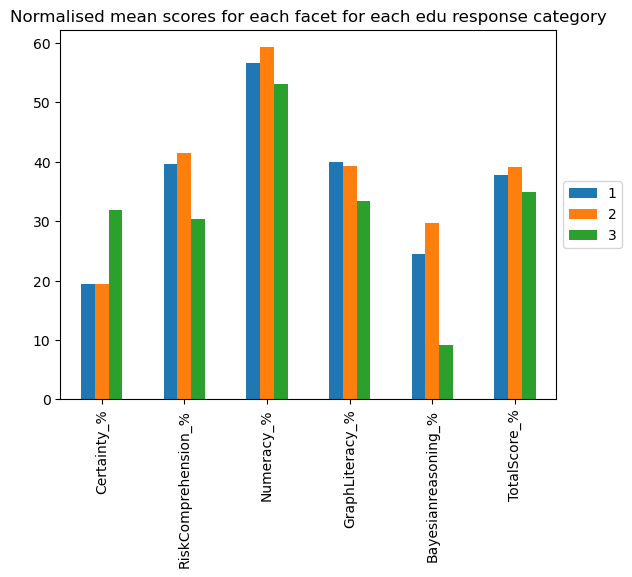

In [72]:
# Normalised mean scores for each facet for each edu response category

df5.groupby('isced')[['Certainty_%','RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%','TotalScore_%']].mean().T.plot(kind = 'bar', title = 'Normalised mean scores for each facet for each edu response category').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

<Axes: xlabel='isced', ylabel='TotalScore_13'>

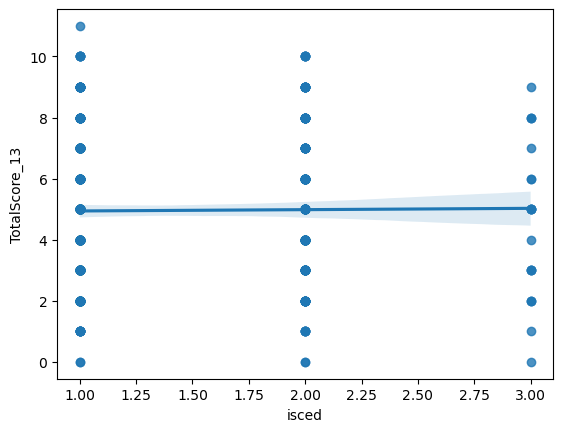

In [73]:
# Trend line for Absolute Total Facet Score vs edu (isced) reponses

sns.regplot (data = df5, x = 'isced', y = 'TotalScore_13')

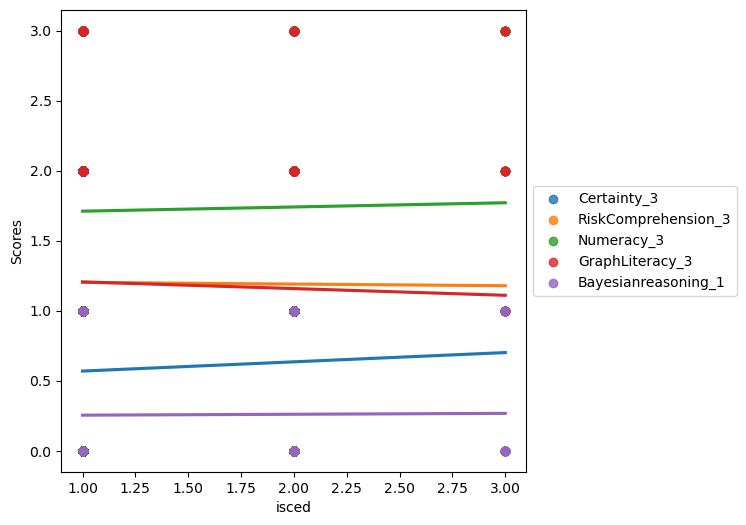

In [74]:
# Trend line for Absolute Independent Facet Score vs edu (isced) reponses

fig, ax6 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df5, x = 'isced', y = 'Certainty_3', fit_reg=True, ci=None, ax=ax6, label='Certainty_3')
sns.regplot (data = df5, x = 'isced', y = 'RiskComprehension_3', fit_reg=True, ci=None, ax=ax6, label='RiskComprehension_3')
sns.regplot (data = df5, x = 'isced', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax6, label='Numeracy_3')
sns.regplot (data = df5, x = 'isced', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax6, label='GraphLiteracy_3')
sns.regplot (data = df5, x = 'isced', y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax6, label='Bayesianreasoning_1' )

ax6.set(ylabel='Scores', xlabel='isced')
ax6.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

<Axes: xlabel='isced', ylabel='TotalScore_13'>

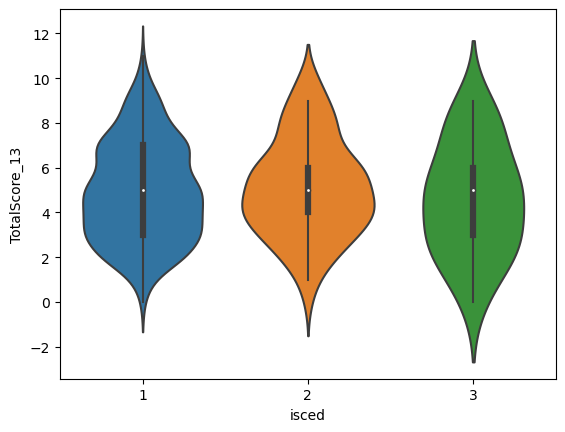

In [75]:
# Violine Plot for TotalScore_13 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'TotalScore_13')

<Axes: xlabel='isced', ylabel='Certainty_3'>

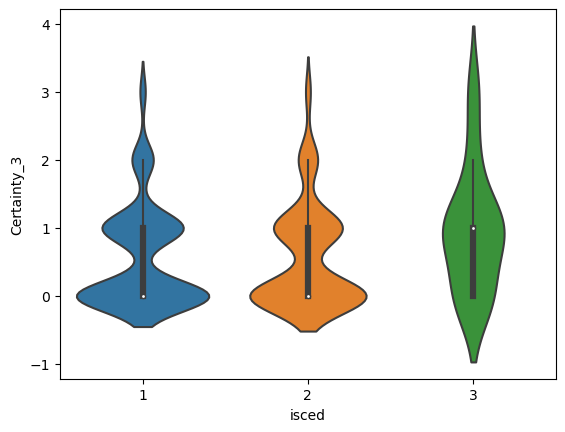

In [76]:
# Violine Plot for Certainty_3 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'Certainty_3')

<Axes: xlabel='isced', ylabel='RiskComprehension_3'>

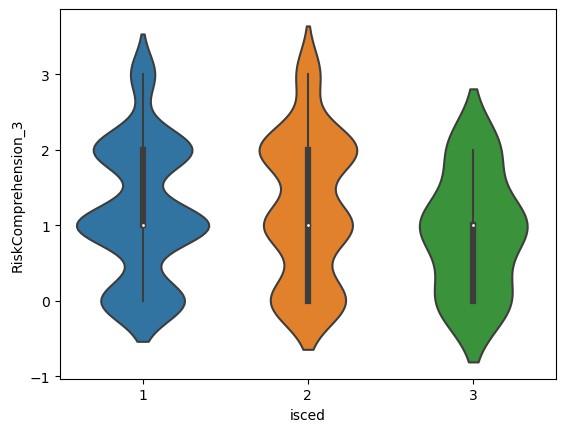

In [77]:
# Violine Plot for RiskComprehension_3 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'RiskComprehension_3')

<Axes: xlabel='isced', ylabel='GraphLiteracy_3'>

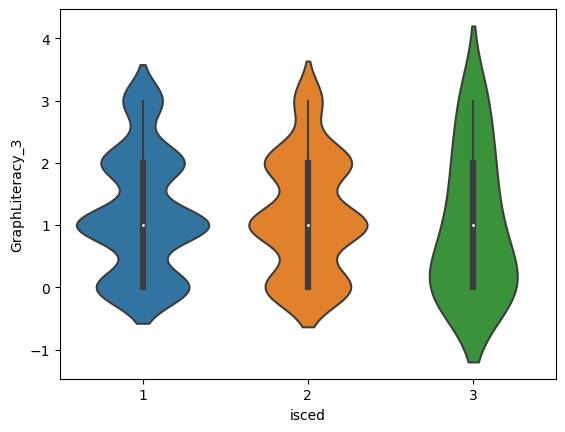

In [78]:
# Violine Plot for GraphLiteracy_3 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'GraphLiteracy_3')

<Axes: xlabel='isced', ylabel='Numeracy_3'>

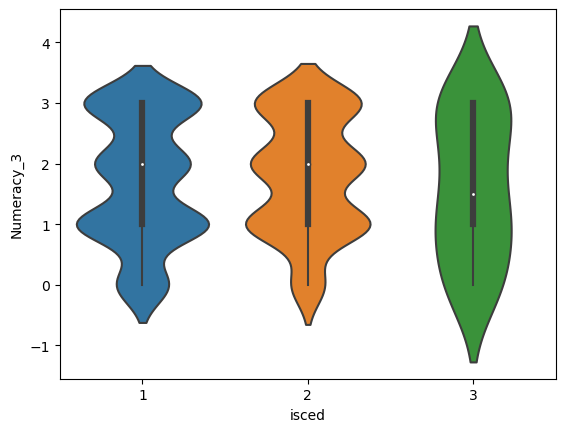

In [79]:
# Violine Plot for Numeracy_3 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'Numeracy_3')

<Axes: xlabel='isced', ylabel='Bayesianreasoning_1'>

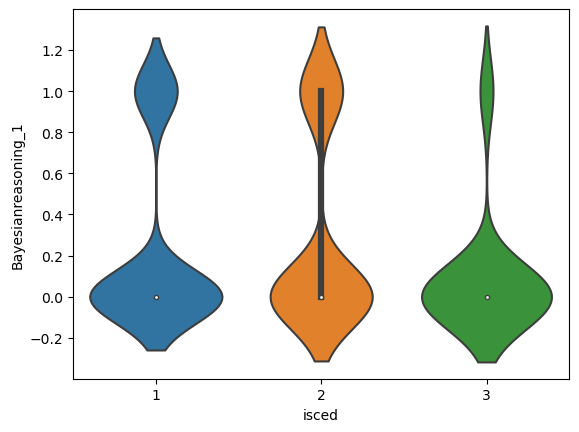

In [80]:
# Violine Plot for TotalScore_13 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'Bayesianreasoning_1')

In [81]:
# Descriptive stats for the data set, isced = 1
# NA values of wealth are removed

df6 = df5.dropna(axis = 0, subset = 'wealth')
# df6.drop(df6[df6['wealth'] == 3500000].index, inplace = True)
df6.loc[df6['isced']==1][['wealth']].describe()

wealth
count  4.050000e+02
mean   1.220912e+07
std    4.537261e+07
min    0.000000e+00
25%    5.000000e+05
50%    1.700000e+06
75%    7.500000e+06
max    5.000000e+08

In [82]:
# Descriptive stats for the data set, isced = 2

df6.loc[df6['isced']==2][['wealth']].describe()

wealth
count  2.160000e+02
mean   1.355720e+07
std    6.621355e+07
min    0.000000e+00
25%    3.375000e+05
50%    9.999500e+05
75%    5.000000e+06
max    6.000000e+08

In [83]:
# Descriptive stats for the data set, isced = 3

df6.loc[df6['isced']==3][['wealth']].describe()

wealth
count  2.200000e+01
mean   3.038705e+06
std    7.097479e+06
min    0.000000e+00
25%    3.500000e+04
50%    2.000000e+05
75%    1.650125e+06
max    3.000000e+07

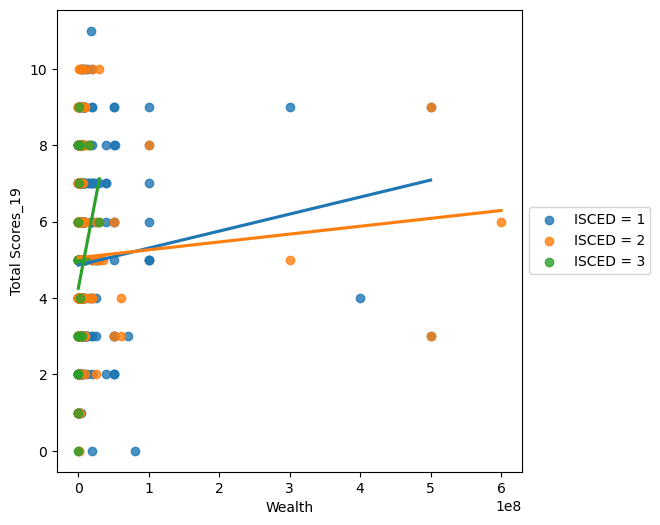

In [84]:
# Trend line for Absolute Tota Facet Score vs wealth reponses sorted by isced and ORDERED by wealth WITH scatter

fig, ax7 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'TotalScore_13', fit_reg=True, ci=None, ax=ax7, label='ISCED = 1')
sns.regplot (data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'TotalScore_13', fit_reg=True, ci=None, ax=ax7, label='ISCED = 2')
sns.regplot (data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'TotalScore_13', fit_reg=True, ci=None, ax=ax7, label='ISCED = 3')

ax7.set(ylabel='Total Scores_19', xlabel='Wealth')
ax7.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

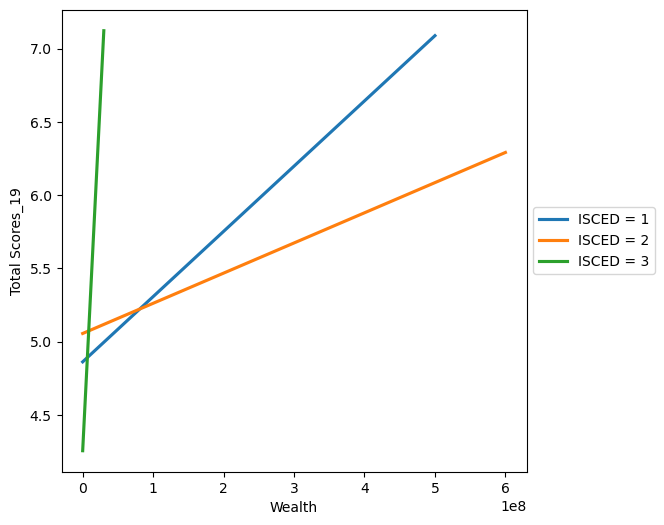

In [85]:
# Trend line for Absolute Tota Facet Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax8 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'TotalScore_13', fit_reg=True, ci=None, ax=ax8, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'TotalScore_13', fit_reg=True, ci=None, ax=ax8, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'TotalScore_13', fit_reg=True, ci=None, ax=ax8, label='ISCED = 3')

ax8.set(ylabel='Total Scores_19', xlabel='Wealth')
ax8.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

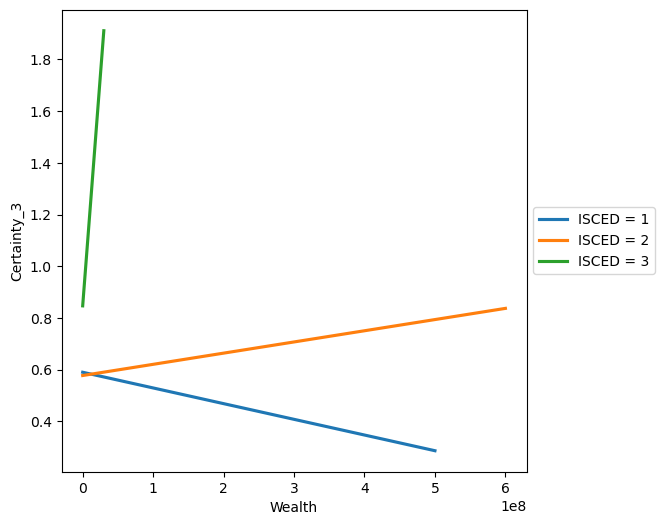

In [86]:
# Trend line for Absolute Certainty Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax9 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'Certainty_3', fit_reg=True, ci=None, ax=ax9, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'Certainty_3', fit_reg=True, ci=None, ax=ax9, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'Certainty_3', fit_reg=True, ci=None, ax=ax9, label='ISCED = 3')

ax9.set(ylabel='Certainty_3', xlabel='Wealth')
ax9.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

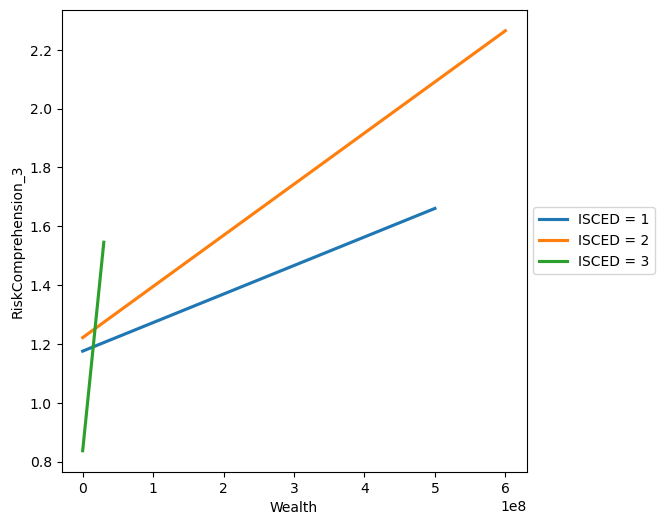

In [87]:
# Trend line for Absolute Uncertainty Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax10 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'RiskComprehension_3', fit_reg=True, ci=None, ax=ax10, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'RiskComprehension_3', fit_reg=True, ci=None, ax=ax10, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'RiskComprehension_3', fit_reg=True, ci=None, ax=ax10, label='ISCED = 3')

ax10.set(ylabel='RiskComprehension_3', xlabel='Wealth')
ax10.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

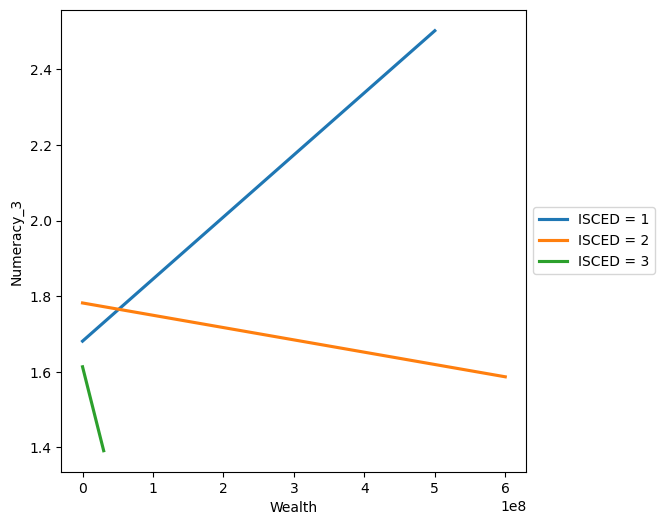

In [88]:
# Trend line for Absolute Number Comprehension Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='Numeracy_3', xlabel='Wealth')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

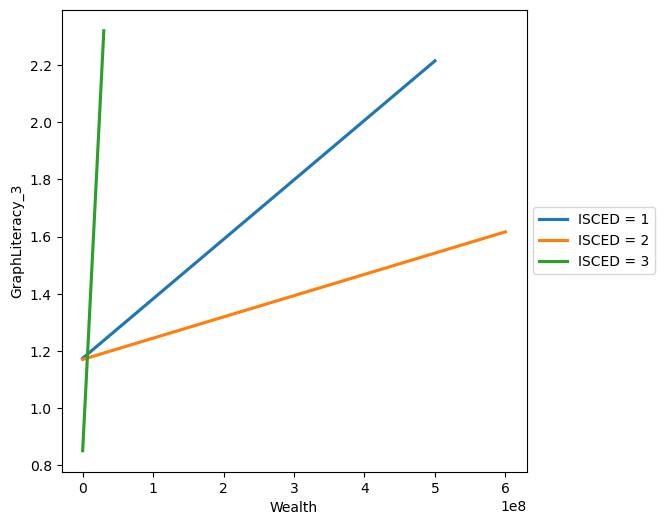

In [89]:
# Trend line for Absolute Graph Comprehension Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='GraphLiteracy_3', xlabel='Wealth')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

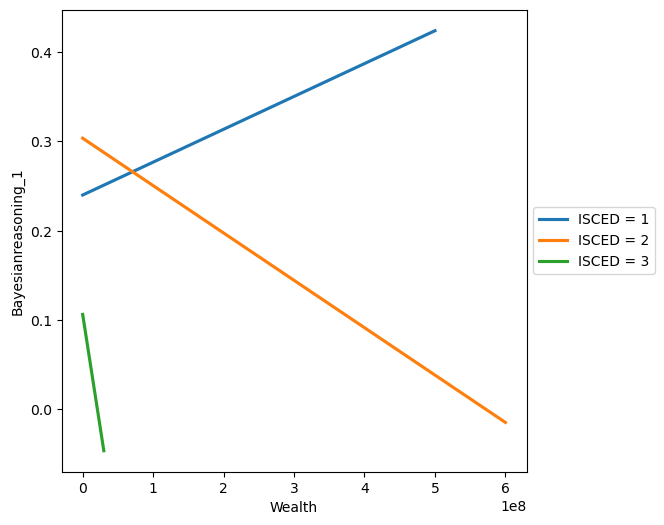

In [90]:
# Trend line for Absolute Bayesian Reasoning Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax12 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 3')

ax12.set(ylabel='Bayesianreasoning_1', xlabel='Wealth')
ax12.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [91]:
# Descriptive stats for the data set, isced = 1
# NA values of income are removed

df7 = df5
df7.drop(df7[df7['income'] == 7].index, inplace = True)

df7.loc[df7['isced']==1].describe()

age     age_rec  isced      income        wealth  Certainty_3  \
count  405.000000  405.000000  405.0  405.000000  4.050000e+02   405.000000   
mean    35.337037    2.446914    1.0    2.627160  1.220912e+07     0.582716   
std      9.171529    0.563117    0.0    1.083976  4.537261e+07     0.745413   
min     21.500000    2.000000    1.0    1.000000  0.000000e+00     0.000000   
25%     30.500000    2.000000    1.0    2.000000  5.000000e+05     0.000000   
50%     30.500000    2.000000    1.0    2.000000  1.700000e+06     0.000000   
75%     40.500000    3.000000    1.0    3.000000  7.500000e+06     1.000000   
max     70.500000    4.000000    1.0    5.000000  5.000000e+08     3.000000   

       RiskComprehension_3  GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  \
count           405.000000        405.00000  405.000000           405.000000   
mean              1.187654          1.20000    1.701235             0.244444   
std               0.889624          0.96061    1.032695             0.430289   
min               0.000000          0.00000    0.000000             0.000000   
25%               1.000000          0.00000    1.000000             0.000000   
50%               1.000000          1.00000    2.000000             0.000000   
75%               2.000000          2.00000    3.000000             0.000000   
max               3.000000          3.00000    3.000000             1.000000   

       Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
count   405.000000           405.000000       405.000000  405.000000   
mean     19.423868            39.588477        40.000000   56.707819   
std      24.847113            29.654143        32.020346   34.423165   
min       0.000000             0.000000         0.000000    0.000000   
25%       0.000000            33.333333         0.000000   33.333333   
50%       0.000000            33.333333        33.333333   66.666667   
75%      33.333333            66.666667        66.666667  100.000000   
max     100.000000           100.000000       100.000000  100.000000   

       Bayesianreasoning_%  TotalScore_13  TotalScore_%  
count           405.000000     405.000000    405.000000  
mean             24.444444       4.916049     37.815764  
std              43.028887       2.212222     17.017090  
min               0.000000       0.000000      0.000000  
25%               0.000000       3.000000     23.076923  
50%               0.000000       5.000000     38.461538  
75%               0.000000       7.000000     53.846154  
max             100.000000      11.000000     84.615385

In [92]:
df7.loc[df7['isced']==2].describe()

age     age_rec  isced      income        wealth  Certainty_3  \
count  216.000000  216.000000  216.0  216.000000  2.160000e+02   216.000000   
mean    33.634259    2.375000    2.0    2.092593  1.355720e+07     0.583333   
std     10.135158    0.564966    0.0    1.016488  6.621355e+07     0.754829   
min     21.500000    2.000000    2.0    1.000000  0.000000e+00     0.000000   
25%     30.500000    2.000000    2.0    1.000000  3.375000e+05     0.000000   
50%     30.500000    2.000000    2.0    2.000000  9.999500e+05     0.000000   
75%     40.500000    3.000000    2.0    2.000000  5.000000e+06     1.000000   
max     60.500000    4.000000    2.0    5.000000  6.000000e+08     3.000000   

       RiskComprehension_3  GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  \
count           216.000000       216.000000  216.000000           216.000000   
mean              1.245370         1.180556    1.777778             0.296296   
std               0.940053         0.930012    0.958034             0.457684   
min               0.000000         0.000000    0.000000             0.000000   
25%               0.000000         0.000000    1.000000             0.000000   
50%               1.000000         1.000000    2.000000             0.000000   
75%               2.000000         2.000000    3.000000             1.000000   
max               3.000000         3.000000    3.000000             1.000000   

       Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
count   216.000000           216.000000       216.000000  216.000000   
mean     19.444444            41.512346        39.351852   59.259259   
std      25.160980            31.335096        31.000403   31.934472   
min       0.000000             0.000000         0.000000    0.000000   
25%       0.000000             0.000000         0.000000   33.333333   
50%       0.000000            33.333333        33.333333   66.666667   
75%      33.333333            66.666667        66.666667  100.000000   
max     100.000000           100.000000       100.000000  100.000000   

       Bayesianreasoning_%  TotalScore_13  TotalScore_%  
count           216.000000     216.000000    216.000000  
mean             29.629630       5.083333     39.102564  
std              45.768394       2.208335     16.987194  
min               0.000000       0.000000      0.000000  
25%               0.000000       4.000000     30.769231  
50%               0.000000       5.000000     38.461538  
75%             100.000000       6.000000     46.153846  
max             100.000000      10.000000     76.923077

In [93]:
df7.loc[df7['isced']==3].describe()

age    age_rec  isced     income        wealth  Certainty_3  \
count  22.000000  22.000000   22.0  22.000000  2.200000e+01    22.000000   
mean   36.681818   2.590909    3.0   1.454545  3.038705e+06     0.954545   
std    14.384636   0.666125    0.0   0.857864  7.097479e+06     0.898532   
min    21.500000   2.000000    3.0   1.000000  0.000000e+00     0.000000   
25%    23.750000   2.000000    3.0   1.000000  3.500000e+04     0.000000   
50%    35.500000   2.500000    3.0   1.000000  2.000000e+05     1.000000   
75%    40.500000   3.000000    3.0   1.750000  1.650125e+06     1.000000   
max    70.500000   4.000000    3.0   4.000000  3.000000e+07     3.000000   

       RiskComprehension_3  GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  \
count            22.000000        22.000000   22.000000            22.000000   
mean              0.909091         1.000000    1.590909             0.090909   
std               0.750180         1.112697    1.181568             0.294245   
min               0.000000         0.000000    0.000000             0.000000   
25%               0.000000         0.000000    1.000000             0.000000   
50%               1.000000         1.000000    1.500000             0.000000   
75%               1.000000         2.000000    3.000000             0.000000   
max               2.000000         3.000000    3.000000             1.000000   

       Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
count    22.000000            22.000000        22.000000   22.000000   
mean     31.818182            30.303030        33.333333   53.030303   
std      29.951058            25.006012        37.089909   39.385614   
min       0.000000             0.000000         0.000000    0.000000   
25%       0.000000             0.000000         0.000000   33.333333   
50%      33.333333            33.333333        33.333333   50.000000   
75%      33.333333            33.333333        66.666667  100.000000   
max     100.000000            66.666667       100.000000  100.000000   

       Bayesianreasoning_%  TotalScore_13  TotalScore_%  
count            22.000000      22.000000     22.000000  
mean              9.090909       4.545455     34.965035  
std              29.424494       2.482842     19.098781  
min               0.000000       0.000000      0.000000  
25%               0.000000       3.000000     23.076923  
50%               0.000000       5.000000     38.461538  
75%               0.000000       6.000000     46.153846  
max             100.000000       9.000000     69.230769

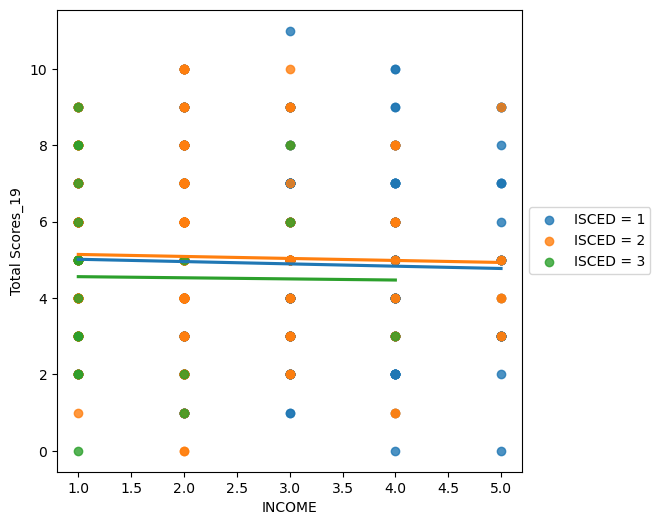

In [94]:
# Trend line for Absolute Tota Facet Score vs income reponses sorted by isced and ORDERED by income WITH scatter

fig, ax7 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = df7.loc[df7['isced']==1]['TotalScore_13'], fit_reg=True, ci=None, ax=ax7, label='ISCED = 1')
sns.regplot (data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = df7.loc[df7['isced']==2]['TotalScore_13'], fit_reg=True, ci=None, ax=ax7, label='ISCED = 2')
sns.regplot (data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = df7.loc[df7['isced']==3]['TotalScore_13'], fit_reg=True, ci=None, ax=ax7, label='ISCED = 3')

ax7.set(ylabel='Total Scores_19', xlabel='INCOME')
ax7.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

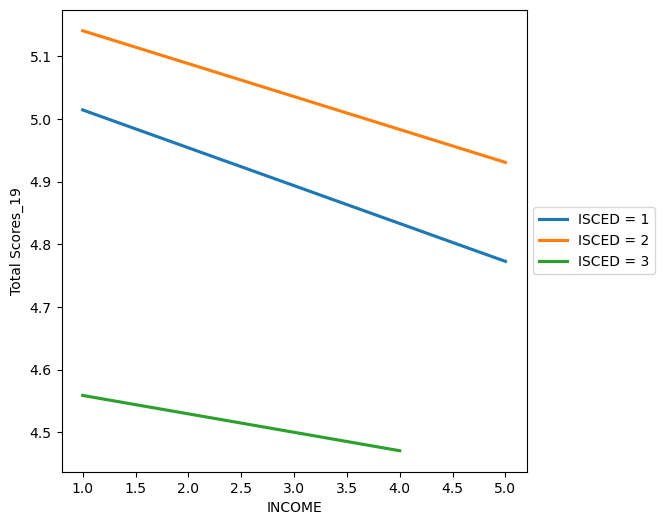

In [95]:
# Trend line for Absolute Tota Facet Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax8 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'TotalScore_13', fit_reg=True, ci=None, ax=ax8, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'TotalScore_13', fit_reg=True, ci=None, ax=ax8, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'TotalScore_13', fit_reg=True, ci=None, ax=ax8, label='ISCED = 3')

ax8.set(ylabel='Total Scores_19', xlabel='INCOME')
ax8.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

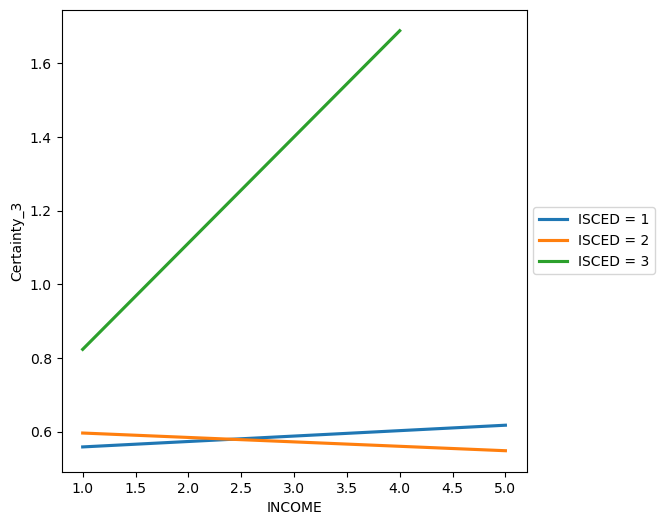

In [96]:
# Trend line for Absolute Certainty Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax9 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'Certainty_3', fit_reg=True, ci=None, ax=ax9, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'Certainty_3', fit_reg=True, ci=None, ax=ax9, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'Certainty_3', fit_reg=True, ci=None, ax=ax9, label='ISCED = 3')

ax9.set(ylabel='Certainty_3', xlabel='INCOME')
ax9.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

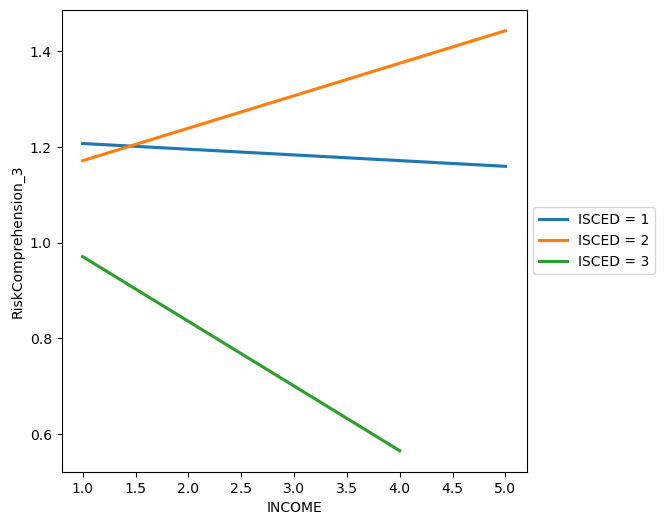

In [97]:
# Trend line for Absolute Risk Comprehension Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax10 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'RiskComprehension_3', fit_reg=True, ci=None, ax=ax10, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'RiskComprehension_3', fit_reg=True, ci=None, ax=ax10, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'RiskComprehension_3', fit_reg=True, ci=None, ax=ax10, label='ISCED = 3')

ax10.set(ylabel='RiskComprehension_3', xlabel='INCOME')
ax10.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

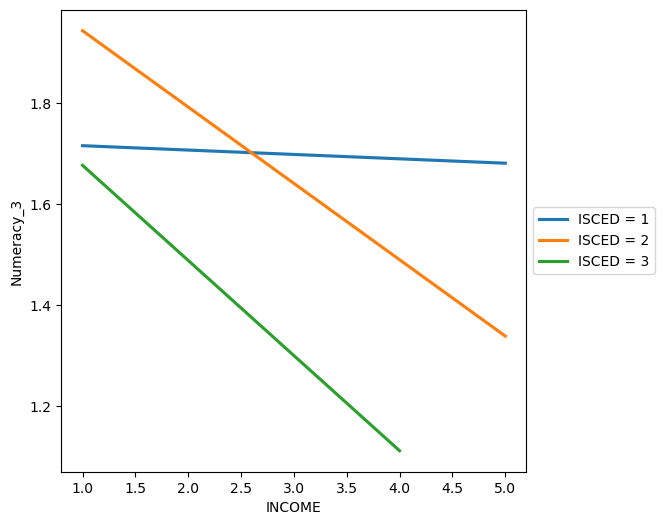

In [98]:
# Trend line for Absolute Number Comprehension Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='Numeracy_3', xlabel='INCOME')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

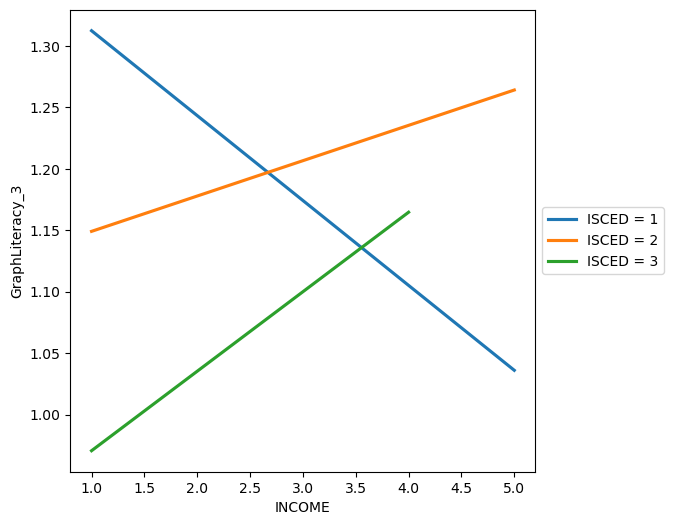

In [99]:
# Trend line for Absolute Graph Comprehension Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='GraphLiteracy_3', xlabel='INCOME')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

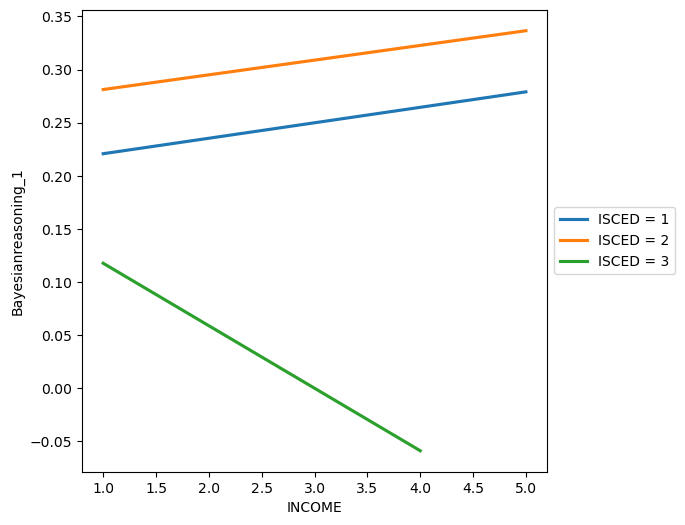

In [100]:
# Trend line for Absolute Bayesian Reasoning Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax12 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 3')

ax12.set(ylabel='Bayesianreasoning_1', xlabel='INCOME')
ax12.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [101]:
df7

ResponseId   age  age_rec  isced  income    wealth  \
0    ztfdlcbiyo1xco3ztfdl4ozqpte2q3m9  30.5        2      1       3   5000000   
1    ten07h1k6r3hqcfqten07isxh8g3c7sd  30.5        2      1       2    500000   
2    h5ngv0k7kcqx5i5qoftgxh5ngv0k7fvv  30.5        2      1       2    500000   
3    h5n6a65bgsz5w1mi1inh5n6a7l54vger  40.5        3      1       2     30000   
4    tftzv0n6j9gvvxwm68xtftzv0hvv1e1m  30.5        2      1       5  20000000   
..                                ...   ...      ...    ...     ...       ...   
638  y139mcxc619h0ooosy139muk14mpfpvm  30.5        2      3       1         0   
639  mj52mssq166g3wubcnkmj520tfdzf8oz  40.5        3      3       1      2000   
640  a31qwuv5yj3n5tlmea3183d7y7salhcl  30.5        2      3       1   5000000   
641  870h2qs77chp1cd5q870n4fnkjbrxezk  21.5        2      3       2    150000   
642  t1hiz7zjzou3pfd59pqt1hizrglay7e5  40.5        3      3       1    200000   

     Certainty_3  RiskComprehension_3  GraphLiteracy_3  Numeracy_3  \
0              1                    2                1           3   
1              0                    0                0           3   
2              1                    2                0           0   
3              1                    1                3           0   
4              0                    0                0           0   
..           ...                  ...              ...         ...   
638            3                    1                0           2   
639            1                    1                1           2   
640            0                    1                0           2   
641            0                    1                0           0   
642            1                    1                2           1   

     Bayesianreasoning_1  Certainty_%  RiskComprehension_%  GraphLiteracy_%  \
0                      0    33.333333            66.666667        33.333333   
1                      0     0.000000             0.000000         0.000000   
2                      0    33.333333            66.666667         0.000000   
3                      0    33.333333            33.333333       100.000000   
4                      0     0.000000             0.000000         0.000000   
..                   ...          ...                  ...              ...   
638                    0   100.000000            33.333333         0.000000   
639                    0    33.333333            33.333333        33.333333   
640                    0     0.000000            33.333333         0.000000   
641                    0     0.000000            33.333333         0.000000   
642                    0    33.333333            33.333333        66.666667   

     Numeracy_%  Bayesianreasoning_%  TotalScore_13  TotalScore_%  
0    100.000000                  0.0              7     53.846154  
1    100.000000                  0.0              3     23.076923  
2      0.000000                  0.0              3     23.076923  
3      0.000000                  0.0              5     38.461538  
4      0.000000                  0.0              0      0.000000  
..          ...                  ...            ...           ...  
638   66.666667                  0.0              6     46.153846  
639   66.666667                  0.0              5     38.461538  
640   66.666667                  0.0              3     23.076923  
641    0.000000                  0.0              1      7.692308  
642   33.333333                  0.0              5     38.461538  

[643 rows x 18 columns]

In [102]:
# Since we already have a classification for Age groups in the form of age_rec, we will use that.
# We will also use median of age to see if it yields any relevant results, as instructed.

# AXES to be used = Age or age groups, ISCED, Income

# Age groups = [2,3,4]
# Age group 2 = 18 to 35 y/o
# Age group 3 = 36 to 59 y/o
# Age group 4 = 60 to 75 y/o (75 y/o, i.e, within the scope of the data we have, it can mean 60 and above also)



In [103]:
df7.loc[(df7['age_rec']==2)].describe()

age  age_rec       isced      income        wealth  Certainty_3  \
count  393.000000    393.0  393.000000  393.000000  3.930000e+02   393.000000   
mean    28.393130      2.0    1.422392    2.310433  9.461581e+06     0.552163   
std      3.815754      0.0    0.548381    1.047503  4.116973e+07     0.737447   
min     21.500000      2.0    1.000000    1.000000  0.000000e+00     0.000000   
25%     30.500000      2.0    1.000000    2.000000  3.000000e+05     0.000000   
50%     30.500000      2.0    1.000000    2.000000  1.000000e+06     0.000000   
75%     30.500000      2.0    2.000000    3.000000  5.000000e+06     1.000000   
max     30.500000      2.0    3.000000    5.000000  5.000000e+08     3.000000   

       RiskComprehension_3  GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  \
count           393.000000       393.000000  393.000000           393.000000   
mean              1.195929         1.165394    1.712468             0.244275   
std               0.917396         0.931656    1.028310             0.430204   
min               0.000000         0.000000    0.000000             0.000000   
25%               0.000000         0.000000    1.000000             0.000000   
50%               1.000000         1.000000    2.000000             0.000000   
75%               2.000000         2.000000    3.000000             0.000000   
max               3.000000         3.000000    3.000000             1.000000   

       Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
count   393.000000           393.000000       393.000000  393.000000   
mean     18.405428            39.864292        38.846480   57.082273   
std      24.581570            30.579878        31.055203   34.276987   
min       0.000000             0.000000         0.000000    0.000000   
25%       0.000000             0.000000         0.000000   33.333333   
50%       0.000000            33.333333        33.333333   66.666667   
75%      33.333333            66.666667        66.666667  100.000000   
max     100.000000           100.000000       100.000000  100.000000   

       Bayesianreasoning_%  TotalScore_13  TotalScore_%  
count           393.000000     393.000000    393.000000  
mean             24.427481       4.870229     37.463300  
std              43.020409       2.154955     16.576576  
min               0.000000       0.000000      0.000000  
25%               0.000000       3.000000     23.076923  
50%               0.000000       5.000000     38.461538  
75%               0.000000       7.000000     53.846154  
max             100.000000      10.000000     76.923077

In [104]:
df7.loc[(df7['age_rec']==3)].describe()

age  age_rec       isced      income        wealth  Certainty_3  \
count  225.000000    225.0  225.000000  225.000000  2.250000e+02   225.000000   
mean    42.900000      3.0    1.360000    2.617778  1.742734e+07     0.662222   
std      4.280354      0.0    0.558378    1.151724  6.999865e+07     0.797118   
min     40.500000      3.0    1.000000    1.000000  0.000000e+00     0.000000   
25%     40.500000      3.0    1.000000    2.000000  3.800000e+05     0.000000   
50%     40.500000      3.0    1.000000    2.000000  2.500000e+06     0.000000   
75%     40.500000      3.0    2.000000    3.000000  7.800000e+06     1.000000   
max     50.500000      3.0    3.000000    5.000000  6.000000e+08     3.000000   

       RiskComprehension_3  GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  \
count           225.000000       225.000000  225.000000           225.000000   
mean              1.195556         1.177778    1.746667             0.271111   
std               0.889913         0.988525    0.983253             0.445524   
min               0.000000         0.000000    0.000000             0.000000   
25%               1.000000         0.000000    1.000000             0.000000   
50%               1.000000         1.000000    2.000000             0.000000   
75%               2.000000         2.000000    3.000000             1.000000   
max               3.000000         3.000000    3.000000             1.000000   

       Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
count   225.000000           225.000000       225.000000  225.000000   
mean     22.074074            39.851852        39.259259   58.222222   
std      26.570594            29.663753        32.950848   32.775087   
min       0.000000             0.000000         0.000000    0.000000   
25%       0.000000            33.333333         0.000000   33.333333   
50%       0.000000            33.333333        33.333333   66.666667   
75%      33.333333            66.666667        66.666667  100.000000   
max     100.000000           100.000000       100.000000  100.000000   

       Bayesianreasoning_%  TotalScore_13  TotalScore_%  
count           225.000000     225.000000    225.000000  
mean             27.111111       5.053333     38.871795  
std              44.552448       2.327399     17.903069  
min               0.000000       0.000000      0.000000  
25%               0.000000       3.000000     23.076923  
50%               0.000000       5.000000     38.461538  
75%             100.000000       7.000000     53.846154  
max             100.000000      11.000000     84.615385

In [105]:
df7.loc[(df7['age_rec']==4)].describe()

age  age_rec      isced     income        wealth  Certainty_3  \
count  25.000000     25.0  25.000000  25.000000  2.500000e+01    25.000000   
mean   62.900000      4.0   1.520000   2.040000  1.201400e+07     0.680000   
std     4.358899      0.0   0.653197   1.098484  1.651268e+07     0.627163   
min    60.500000      4.0   1.000000   1.000000  1.000000e+05     0.000000   
25%    60.500000      4.0   1.000000   1.000000  2.000000e+06     0.000000   
50%    60.500000      4.0   1.000000   2.000000  5.000000e+06     1.000000   
75%    60.500000      4.0   2.000000   2.000000  1.000000e+07     1.000000   
max    70.500000      4.0   3.000000   5.000000  5.250000e+07     2.000000   

       RiskComprehension_3  GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  \
count            25.000000        25.000000   25.000000            25.000000   
mean              1.240000         1.600000    1.680000             0.320000   
std               0.830662         0.957427    1.069268             0.476095   
min               0.000000         0.000000    0.000000             0.000000   
25%               1.000000         1.000000    1.000000             0.000000   
50%               1.000000         2.000000    1.000000             0.000000   
75%               2.000000         2.000000    3.000000             1.000000   
max               3.000000         3.000000    3.000000             1.000000   

       Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
count    25.000000            25.000000        25.000000   25.000000   
mean     22.666667            41.333333        53.333333   56.000000   
std      20.905431            27.688746        31.914237   35.642255   
min       0.000000             0.000000         0.000000    0.000000   
25%       0.000000            33.333333        33.333333   33.333333   
50%      33.333333            33.333333        66.666667   33.333333   
75%      33.333333            66.666667        66.666667  100.000000   
max      66.666667           100.000000       100.000000  100.000000   

       Bayesianreasoning_%  TotalScore_13  TotalScore_%  
count            25.000000      25.000000     25.000000  
mean             32.000000       5.520000     42.461538  
std              47.609523       2.200757     16.928903  
min               0.000000       2.000000     15.384615  
25%               0.000000       4.000000     30.769231  
50%               0.000000       5.000000     38.461538  
75%             100.000000       8.000000     61.538462  
max             100.000000       9.000000     69.230769

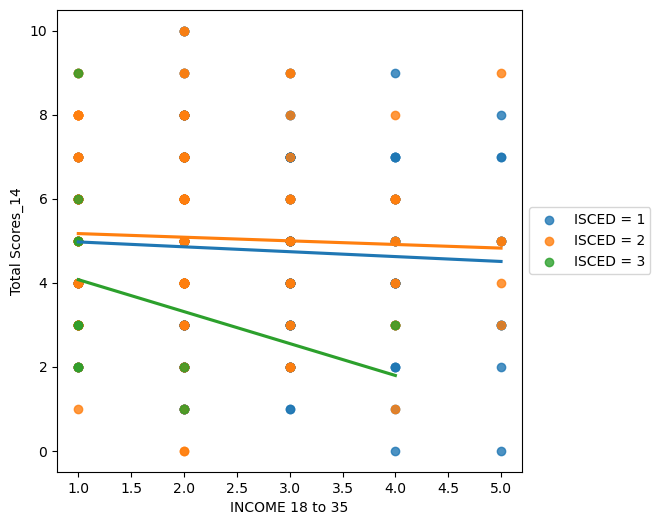

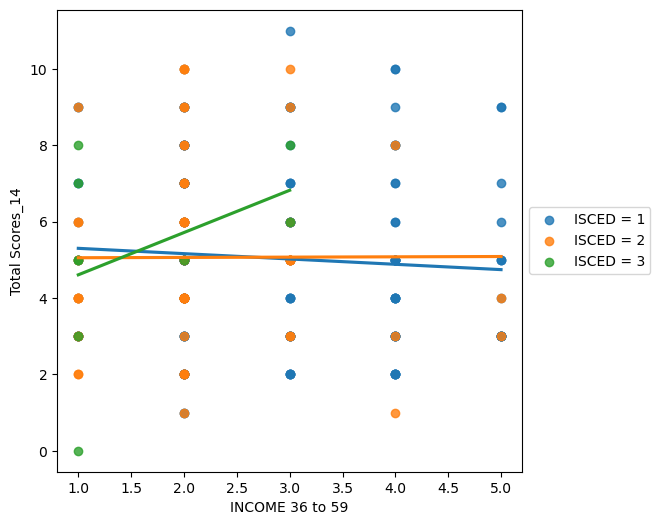

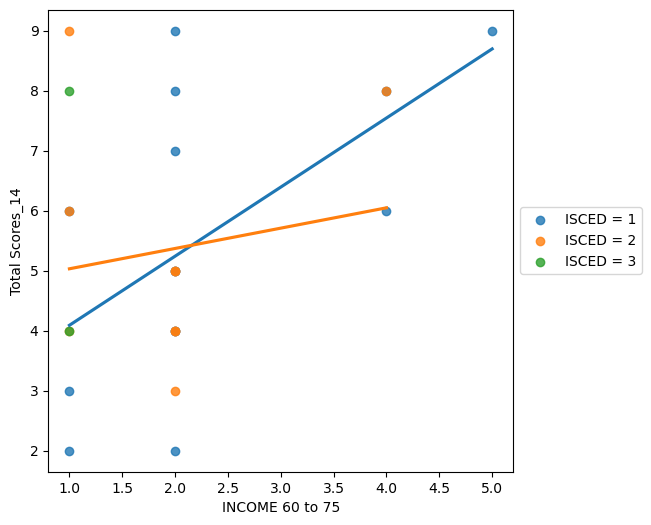

In [106]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Total Scores_14', xlabel='INCOME 18 to 35')
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Total Scores_14', xlabel='INCOME 36 to 59')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Total Scores_14', xlabel='INCOME 60 to 75')
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

ValueError: 'x' and 'y' must have the same size

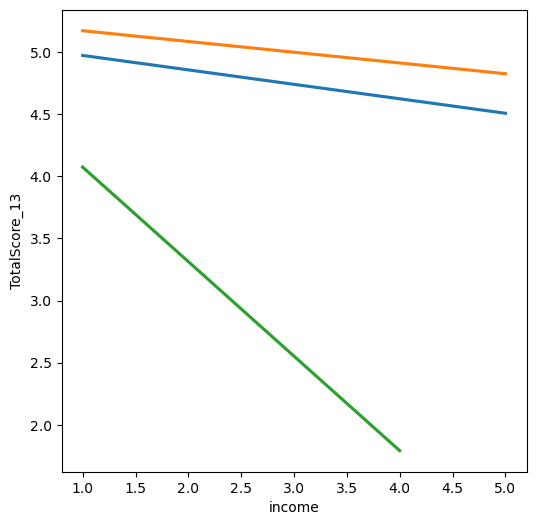

In [107]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==2  ].groupby(['income']).mean(numeric_only=True)['TotalScore_13'], yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income'])['TotalScore_13'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Total Scores_14', xlabel='INCOME 18 to 35',  yticks = np.arange(5, 16 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Total Scores_14', xlabel='INCOME 36 to 59',  yticks = np.arange(5, 16 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==3  ].groupby(['income']).mean(numeric_only=True)['TotalScore_13'], yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income'])['TotalScore_13'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Total Scores_14', xlabel='INCOME 60 to 75',  yticks = np.arange(5, 16 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df7.loc[ df7['age_rec']== 4 ]['income'].unique(), y = df7.loc[ df7['age_rec']==4  ].groupby(['income']).mean(numeric_only=True)['TotalScore_13'], yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income'])['TotalScore_13'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['Certainty_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['Certainty_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['Certainty_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Certainty_3', xlabel='INCOME 18 to 35',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==2  ].groupby(['income'])['Certainty_3'].mean(), yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income'])['Certainty_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['Certainty_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['Certainty_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['Certainty_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Certainty_3', xlabel='INCOME 36 to 59',  yticks = np.arange(0, 6 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==3  ].groupby(['income'])['Certainty_3'].mean(), yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income'])['Certainty_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['Certainty_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['Certainty_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['Certainty_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Certainty_3', xlabel='INCOME 60 to 75',  yticks = np.arange(0, 6 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df7.loc[ df7['age_rec']== 4 ]['income'].unique(), y = df7.loc[ df7['age_rec']==4  ].groupby(['income'])['Certainty_3'].mean(), yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income'])['Certainty_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['RiskComprehension_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['RiskComprehension_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['RiskComprehension_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='RiskComprehension_3', xlabel='INCOME 18 to 35',  yticks = np.arange(0, 3 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==2  ].groupby(['income'])['RiskComprehension_3'].mean(), yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income'])['RiskComprehension_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['RiskComprehension_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['RiskComprehension_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['RiskComprehension_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='RiskComprehension_3', xlabel='INCOME 36 to 59',  yticks = np.arange(0, 3 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==3  ].groupby(['income'])['RiskComprehension_3'].mean(), yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income'])['RiskComprehension_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['RiskComprehension_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['RiskComprehension_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['RiskComprehension_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='RiskComprehension_3', xlabel='INCOME 60 to 75',  yticks = np.arange(0, 3 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df7.loc[ df7['age_rec']== 4 ]['income'].unique(), y = df7.loc[ df7['age_rec']==4  ].groupby(['income'])['RiskComprehension_3'].mean(), yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income'])['RiskComprehension_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Numeracy_3', xlabel='INCOME 18 to 35',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==2  ].groupby(['income'])['Numeracy_3'].mean(), yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income'])['Numeracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Numeracy_3', xlabel='INCOME 36 to 59',  yticks = np.arange(0, 6 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==3  ].groupby(['income'])['Numeracy_3'].mean(), yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income'])['Numeracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Numeracy_3', xlabel='INCOME 60 to 75',  yticks = np.arange(0, 6 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df7.loc[ df7['age_rec']== 4 ]['income'].unique(), y = df7.loc[ df7['age_rec']==4  ].groupby(['income'])['Numeracy_3'].mean(), yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income'])['Numeracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='GraphLiteracy_3', xlabel='INCOME 18 to 35',  yticks = np.arange(0, 4 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==2  ].groupby(['income'])['GraphLiteracy_3'].mean(), yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='GraphLiteracy_3', xlabel='INCOME 36 to 59',  yticks = np.arange(0, 4 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==3  ].groupby(['income'])['GraphLiteracy_3'].mean(), yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='GraphLiteracy_3', xlabel='INCOME 60 to 75',  yticks = np.arange(0, 4 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df7.loc[ df7['age_rec']== 4 ]['income'].unique(), y = df7.loc[ df7['age_rec']==4  ].groupby(['income'])['GraphLiteracy_3'].mean(), yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Bayesianreasoning_1', xlabel='INCOME 18 to 35',  yticks = np.arange(0, 5 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==2  ].groupby(['income'])['Bayesianreasoning_1'].mean(), yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Bayesianreasoning_1', xlabel='INCOME 36 to 59',  yticks = np.arange(0, 5 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==3  ].groupby(['income'])['Bayesianreasoning_1'].mean(), yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Bayesianreasoning_1', xlabel='INCOME 60 to 75',  yticks = np.arange(0, 5 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df7.loc[ df7['age_rec']== 4 ]['income'].unique(), y = df7.loc[ df7['age_rec']==4  ].groupby(['income'])['Bayesianreasoning_1'].mean(), yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

In [ ]:
# Age weighted mean method

In [ ]:
df2["age"].value_counts()

In [ ]:
age_m = (30.5 * 301 + 40.5*171 + 21.5*92 + 50.5*54 + 60.5*19+ 70.6*6)/(301+171+92+54+19+6)
age_m

In [ ]:
df7["income"].value_counts()

In [ ]:
df7.loc[(df7['age'] < age_m)].describe()

In [ ]:
df7.loc[(df7['age'] > age_m)].describe()

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Total Scores_19', xlabel='INCOME for < median age')
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Total Scores_19', xlabel='INCOME for > median age')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df7.loc[ (df7['age'] < age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income'])['TotalScore_13'].mean(), yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income'])['TotalScore_13'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Total Scores_19', xlabel='INCOME for < median age',  yticks = np.arange(5, 16 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['TotalScore_13'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df7.loc[ (df7['age'] > age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] > age_m)  ].groupby(['income'])['TotalScore_13'].mean(), yerr = df7.loc[ (df7['age'] > age_m) ].groupby(['income'])['TotalScore_13'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Total Scores_19', xlabel='INCOME for > median age',  yticks = np.arange(5, 16 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['Certainty_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['Certainty_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['Certainty_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df7.loc[ (df7['age'] < age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income'])['Certainty_3'].mean(), yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income'])['Certainty_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Certainty_3', xlabel='INCOME for < median age',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['Certainty_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['Certainty_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['Certainty_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df7.loc[ (df7['age'] > age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] > age_m)  ].groupby(['income'])['Certainty_3'].mean(), yerr = df7.loc[ (df7['age'] > age_m) ].groupby(['income'])['Certainty_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Certainty_3', xlabel='INCOME for > median age')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['RiskComprehension_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['RiskComprehension_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['RiskComprehension_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df7.loc[ (df7['age'] < age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income'])['RiskComprehension_3'].mean(), yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income'])['RiskComprehension_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='RiskComprehension_3', xlabel='INCOME for < median age',  yticks = np.arange(0, 3 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['RiskComprehension_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['RiskComprehension_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['RiskComprehension_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df7.loc[ (df7['age'] > age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] > age_m)  ].groupby(['income'])['RiskComprehension_3'].mean(), yerr = df7.loc[ (df7['age'] > age_m) ].groupby(['income'])['RiskComprehension_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='RiskComprehension_3', xlabel='INCOME for > median age',  yticks = np.arange(0, 3 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df7.loc[ (df7['age'] < age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income'])['Numeracy_3'].mean(), yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income'])['Numeracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Numeracy_3', xlabel='INCOME for < median age',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df7.loc[ (df7['age'] > age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] > age_m)  ].groupby(['income'])['Numeracy_3'].mean(), yerr = df7.loc[ (df7['age'] > age_m) ].groupby(['income'])['Numeracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Numeracy_3', xlabel='INCOME for > median age',  yticks = np.arange(0, 6 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df7.loc[ (df7['age'] < age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income'])['GraphLiteracy_3'].mean(), yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='GraphLiteracy_3', xlabel='INCOME for < median age',  yticks = np.arange(0, 4 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df7.loc[ (df7['age'] > age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] > age_m)  ].groupby(['income'])['GraphLiteracy_3'].mean(), yerr = df7.loc[ (df7['age'] > age_m) ].groupby(['income'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='GraphLiteracy_3', xlabel='INCOME for > median age',  yticks = np.arange(0, 4 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df7.loc[ (df7['age'] < age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income'])['Bayesianreasoning_1'].mean(), yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Bayesianreasoning_1', xlabel='INCOME for < median age',  yticks = np.arange(0, 5 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df7.loc[ (df7['age'] > age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] > age_m)  ].groupby(['income'])['Bayesianreasoning_1'].mean(), yerr = df7.loc[ (df7['age'] > age_m) ].groupby(['income'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Bayesianreasoning_1', xlabel='INCOME for > median age',  yticks = np.arange(0, 5 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()